# **La esencia del cliente**

PREDECIR COSTO EN CAMPAÑAS DE MEDIOS EN FOOD MART DE USA.
SOBRE LA BASE DE 60.000 INGRESOS DE CLIENTES, PRODUCTOS, PROMOCIONES Y CARACTERÍSTICAS DE LA TIENDA.
ACERCA DE ALIMENTOS:

Food Mart (CFM) es una cadena de tiendas de conveniencia de Estados Unidos. La sede de la empresa privada está ubicada en Mentor, Ohio, y actualmente hay aproximadamente 325 tiendas ubicadas en Estados Unidos. Convenient Food Mart opera en el sistema de franquicia.

Food Mart era la tercera cadena de tiendas de conveniencia más grande del país en 1988.

La bolsa NASDAQ eliminó Convenient Food Mart el mismo año cuando la compañía no cumplió con los requisitos de informes financieros.

Carden & Cherry anunciaron Convenient Food Mart con el personaje de Ernest en la década de 1980.


**Descripción**

¡Has profundizado bastante en Ciencia de Datos, y hoy te traemos el desafío de

Machine Learning: La Esencia del Cliente - Parte 1!

La junta directiva de la cadena de supermercados Universal Food ha observado una estabilización en sus ventas y busca comprender cómo mejorar la relación con sus clientes, entendiendo sus hábitos de compra, para ofrecerles un servicio de mayor calidad. El objetivo es proporcionarles una experiencia de compra más personalizada, rápida y efectiva.



#1. Configuración del Ambiente

Descripción

Para desarrollar este desafío te recomendamos trabajar directamente desde la plataforma Google Colab. (Recuerda que debes tener una cuenta en gmail, si aún no la tienes, debes crearla).

Accede a la siguiente URL: Google Colab

Debes crear un nuevo Notebook, y asignarle el nombre que desees: Ej.
La esencia del cliente 1

Tras seguir los pasos anteriores, debes conectar tu notebook con tu cuenta de Google Drive. Para ello, en una nueva celda de código digita y ejecuta:
from google.colab import drive
drive.mount('/content/drive')

Accede a las siguientes URLs para descargar el dataset que estaremos utilizando:
Cost Prediction on acquiring Customers.
https://www.kaggle.com/datasets/ramjasmaurya/medias-cost-prediction-in-foodmart

Después de descargar el dataset, crea un directorio en tu cuenta de Drive y haz el upload de este.

In [ ]:
!pip install seaborn
!pip show seaborn

Name: seaborn
Version: 0.13.1
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: /usr/local/lib/python3.10/dist-packages
Requires: matplotlib, numpy, pandas
Required-by: missingno


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import warnings

warnings.filterwarnings('ignore') #warnings.filterwarnings(action='once')

print(f'matplotlib ---->{matplotlib.__version__}')
print(f'seaborn ---->{sns.__version__}')
print(f'pandas ---->{pd.__version__}')
print(f'numpy ---->{np.__version__}')
print(f'sklearn ---->{sklearn.__version__}')

matplotlib ---->3.7.1
seaborn ---->0.13.1
pandas ---->2.0.3
numpy ---->1.25.2
sklearn ---->1.2.2


In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

df = pd.read_csv('/content/drive/MyDrive/Alura_latam/BootCamp_Data_Science/Challenge_2_Esencia_cliente_1/media prediction and its cost.csv',sep=',')

In [ ]:
df.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               60428 non-null  object 
 1   food_department             60428 non-null  object 
 2   food_family                 60428 non-null  object 
 3   store_sales(in millions)    60428 non-null  float64
 4   store_cost(in millions)     60428 non-null  float64
 5   unit_sales(in millions)     60428 non-null  float64
 6   promotion_name              60428 non-null  object 
 7   sales_country               60428 non-null  object 
 8   marital_status              60428 non-null  object 
 9   gender                      60428 non-null  object 
 10  total_children              60428 non-null  float64
 11  education                   60428 non-null  object 
 12  member_card                 60428 non-null  object 
 13  occupation                  604

In [ ]:
df.member_card.unique()

array(['Normal', 'Silver', 'Bronze', 'Golden'], dtype=object)

In [ ]:
df.member_card.value_counts()

member_card
Bronze    33807
Normal    13867
Golden     7556
Silver     5198
Name: count, dtype: int64

# 2. Obtención de los datos

Descripción

1. Para que puedas cargar en tu notebook los archivos que almacenaste previamente en tu cuenta de Drive, debes utilizar la biblioteca pandas.

2. Como el dataset original está en inglés, lo vas a dejar todo en español para que puedas tener una mejor comprensión del mismo. La idea no es que inviertas tu tiempo en la traducción del dataset y, por este motivo, aquí te voy a dejar un link con un archivo de python que contiene los diccionarios:

Diccionarios

3. Tu dataset para el análisis lo debes exportar en formato .csv y almacenarlo en tu directorio de Drive, pues será necesario para la segunda parte del desafío.



In [ ]:
df.columns

Index(['food_category', 'food_department', 'food_family',
       'store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'promotion_name', 'sales_country',
       'marital_status', 'gender', 'total_children', 'education',
       'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)',
       'avg. yearly_income', 'num_children_at_home',
       'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight',
       'net_weight', 'recyclable_package', 'low_fat', 'units_per_case',
       'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft',
       'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar',
       'prepared_food', 'florist', 'media_type', 'cost'],
      dtype='object')

In [ ]:
columnas = {
    'food_category': 'categoria_alimento',
    'food_department': 'departamento',
    'food_family': 'tipo',
    'store_sales(in millions)': 'ventas_tienda(en millones)',
    'store_cost(in millions)': 'costo_tienda(en millones)',
    'unit_sales(in millions)': 'ventas_unitarias(en millones)',
    'promotion_name': 'promocion',
    'sales_country': 'pais',
    'marital_status': 'estado_civil',
    'gender': 'genero',
    'total_children': 'total_de_hijos',
    'education': 'escolaridad',
    'member_card': 'miembro',
    'occupation': 'ocupacion',
    'houseowner': 'vivienda_propia',
    'avg_cars_at home(approx)': 'promedio_autos(aprox)',
    'avg. yearly_income': 'ingreso_anual',
    'num_children_at_home': 'numero_hijos',
    'avg_cars_at home(approx).1': 'promedio_autos(aprox)',
    'brand_name': 'marca',
    'SRP': 'precio_recomendado',
    'gross_weight': 'peso_bruto',
    'net_weight': 'peso_neto',
    'recyclable_package': 'empaque_reciclable',
    'low_fat': 'bajo_en_grasa',
    'units_per_case': 'unidades_por_caja',
    'store_type': 'comercio',
    'store_city': 'ciudad',
    'store_state': 'estado',
    'store_sqft': 'pies_cuadrados_tienda',
    'grocery_sqft': 'pies_cuadrados_comestibles',
    'frozen_sqft': 'pies_cuadrados_congelados',
    'meat_sqft': 'pies_cuadrados_carne',
    'coffee_bar': 'cafeteria',
    'video_store': 'tienda_de_videos',
    'salad_bar': 'barra_de_ensaladas',
    'prepared_food': 'comida_preparada',
    'florist': 'floristeria',
    'media_type': 'divulgacion',
    'cost': 'costo'
}

In [ ]:
cfm = df.rename(columns = columnas)
cfm.columns

Index(['categoria_alimento', 'departamento', 'tipo',
       'ventas_tienda(en millones)', 'costo_tienda(en millones)',
       'ventas_unitarias(en millones)', 'promocion', 'pais', 'estado_civil',
       'genero', 'total_de_hijos', 'escolaridad', 'miembro', 'ocupacion',
       'vivienda_propia', 'promedio_autos(aprox)', 'ingreso_anual',
       'numero_hijos', 'promedio_autos(aprox)', 'marca', 'precio_recomendado',
       'peso_bruto', 'peso_neto', 'empaque_reciclable', 'bajo_en_grasa',
       'unidades_por_caja', 'comercio', 'ciudad', 'estado',
       'pies_cuadrados_tienda', 'pies_cuadrados_comestibles',
       'pies_cuadrados_congelados', 'pies_cuadrados_carne', 'cafeteria',
       'tienda_de_videos', 'barra_de_ensaladas', 'comida_preparada',
       'floristeria', 'divulgacion', 'costo'],
      dtype='object')

In [ ]:
#columnas = list(cfm.select_dtypes(include=['object']).columns)
#columnas
cfm.head()
cfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   categoria_alimento             60428 non-null  object 
 1   departamento                   60428 non-null  object 
 2   tipo                           60428 non-null  object 
 3   ventas_tienda(en millones)     60428 non-null  float64
 4   costo_tienda(en millones)      60428 non-null  float64
 5   ventas_unitarias(en millones)  60428 non-null  float64
 6   promocion                      60428 non-null  object 
 7   pais                           60428 non-null  object 
 8   estado_civil                   60428 non-null  object 
 9   genero                         60428 non-null  object 
 10  total_de_hijos                 60428 non-null  float64
 11  escolaridad                    60428 non-null  object 
 12  miembro                        60428 non-null 

In [ ]:
cfm.miembro.unique()

array(['Normal', 'Silver', 'Bronze', 'Golden'], dtype=object)

In [ ]:
cfm['miembro']

0        Normal
1        Silver
2        Normal
3        Bronze
4        Bronze
          ...  
60423    Normal
60424    Bronze
60425    Bronze
60426    Bronze
60427    Bronze
Name: miembro, Length: 60428, dtype: object

In [ ]:
cfm.miembro.value_counts()

miembro
Bronze    33807
Normal    13867
Golden     7556
Silver     5198
Name: count, dtype: int64

In [ ]:
categoria_alimento = {
    'Vegetables': 'Vegetales',
    'Snack Foods': 'Alimentos para picar',
    'Dairy': 'Productos lácteos',
    'Meat': 'Carne',
    'Fruit': 'Fruta',
    'Jams and Jellies': 'Mermeladas y jaleas',
    'Baking Goods': 'Productos para hornear',
    'Breakfast Foods': 'Alimentos para el desayuno',
    'Bread': 'Pan',
    'Canned Soup': 'Sopa enlatada',
    'Beer and Wine': 'Cerveza y vino',
    'Paper Products': 'Productos de papel',
    'Bathroom Products': 'Productos de baño',
    'Electrical': 'Eléctrico',
    'Candy': 'Dulces',
    'Frozen Desserts': 'Postres congelados',
    'Specialty': 'Especialidades',
    'Starchy Foods': 'Alimentos ricos en almidón',
    'Magazines': 'Revistas',
    'Kitchen Products': 'Productos de cocina',
    'Eggs': 'Huevos',
    'Hot Beverages': 'Bebidas calientes',
    'Hygiene': 'Higiene',
    'Pain Relievers': 'Analgésicos',
    'Pizza': 'Pizza',
    'Carbonated Beverages': 'Bebidas carbonatadas',
    'Pure Juice Beverages': 'Bebidas de jugo puro',
    'Cleaning Supplies': 'Suministros de limpieza',
    'Side Dishes': 'Acompañamientos',
    'Frozen Entrees': 'Platos preparados congelados',
    'Drinks': 'Bebidas',
    'Plastic Products': 'Productos de plástico',
    'Hardware': 'Artículos de ferretería',
    'Cold Remedies': 'Remedios para el resfriado',
    'Decongestants': 'Descongestionantes',
    'Canned Tuna': 'Atún enlatado',
    'Seafood': 'Mariscos',
    'Canned Anchovies': 'Anchoas enlatadas',
    'Canned Clams': 'Almejas enlatadas',
    'Candles': 'Velas',
    'Miscellaneous': 'Misceláneos',
    'Canned Oysters': 'Ostras enlatadas',
    'Canned Shrimp': 'Camarones enlatados',
    'Packaged Vegetables': 'Vegetales envasados',
    'Canned Sardines': 'Sardinas enlatadas'
}
cfm.categoria_alimento=cfm.categoria_alimento.map(categoria_alimento)

departamento = {
    'Produce': 'Productos frescos',
    'Snack Foods': 'Alimentos para picar',
    'Household': 'Artículos para el hogar',
    'Frozen Foods': 'Alimentos congelados',
    'Baking Goods': 'Productos para hornear',
    'Canned Foods': 'Alimentos enlatados',
    'Dairy': 'Productos lácteos',
    'Health and Hygiene': 'Salud e higiene',
    'Beverages': 'Bebidas',
    'Deli': 'Charcutería',
    'Baked Goods': 'Productos horneados',
    'Alcoholic Beverages': 'Bebidas alcohólicas',
    'Snacks': 'Snacks',
    'Starchy Foods': 'Alimentos ricos en almidón',
    'Periodicals': 'Publicaciones periódicas',
    'Eggs': 'Huevos',
    'Breakfast Foods': 'Alimentos para el desayuno',
    'Canned Products': 'Productos enlatados',
    'Checkout': 'Caja de salida',
    'Meat': 'Carne',
    'Seafood': 'Mariscos',
    'Carousel': 'Carrusel'
}
cfm.departamento=cfm.departamento.map(departamento)

tipo= {'Food':'Comida', 'Non-Consumable':'No comestible', 'Drink':'Bebida'}

cfm.tipo=cfm.tipo.map(tipo)

promocion = {
    'Weekend Markdown': 'Descuento de fin de semana',
    'Two Day Sale': 'Venta de dos días',
    'Price Savers': 'Ahorro de precios',
    'Price Winners': 'Ganadores de precios',
    'Save-It Sale': 'Venta Ahorra Ya',
    'Super Duper Savers': 'Super Ahorradores',
    'Super Savers': 'Super Ahorro',
    'One Day Sale': 'Venta de un día',
    'Double Down Sale': 'Venta Doble',
    'High Roller Savings': 'Ahorro para apostadores grandes',
    'Green Light Days': 'Días de luz verde',
    'Shelf Clearing Days': 'Días de liquidación de estanterías',
    'Price Slashers': 'Rebajadores de precios',
    'Free For All': 'Gratis para todos',
    'Cash Register Lottery': 'Lotería de la caja registradora',
    'Go For It': 'Adelante',
    'Two for One': 'Dos por uno',
    'Money Savers': 'Ahorradores de dinero',
    'Big Time Discounts': 'Descuentos de gran magnitud',
    'Price Destroyers': 'Destructores de precios',
    'Saving Days': 'Días de ahorro',
    'Dollar Cutters': 'Recortadores de dólares',
    'Unbeatable Price Savers': 'Ahorro de precios imbatible',
    'Sales Galore': 'Promociones por montones',
    'Big Promo': 'Gran promoción',
    'Dimes Off': 'Más barato',
    'Sales Days': 'Días de venta',
    'Price Cutters': 'Rebajando precios',
    'You Save Days': 'Días de ahorro',
    'Savings Galore': 'Ahorros por montones',
    'Bag Stuffers': 'Bolsas llenas',
    'Three for One': 'Tres por uno',
    'I Cant Believe It Sale': 'Venta No Puedo Creerlo',
    'Sale Winners': 'Ganadores de ventas',
    'Pick Your Savings': 'Elige tus ahorros',
    'Bye Bye Baby': 'Adiós bebé',
    'Best Savings': 'Mejores ahorros',
    'Tip Top Savings': 'Ahorro de primera clase',
    'Shelf Emptiers': 'Estantes vacíos',
    'Big Time Savings': 'Ahorro Enorme',
    'Wallet Savers': 'Ahorradores de billetera',
    'Dollar Days': 'Días de dólar',
    'Mystery Sale': 'Venta misteriosa',
    'Price Smashers': 'Aplastadores de precios',
    'Green Light Special': 'Especial luz verde',
    'Coupon Spectacular': 'Espectacular de cupones',
    'Super Wallet Savers': 'Super ahorradores de billetera',
    'Double Your Savings': 'Duplica tus ahorros',
    'Fantastic Discounts': 'Descuentos fantásticos'
}

cfm.promocion=cfm.promocion.map(promocion)

escolaridad = {
    'Partial High School':'Primaria',
    'High School Degree':'Secundaria',
    'Bachelors Degree':'Superior',
    'Partial College':'Técnico',
    'Graduate Degree':'Maestría'
}

cfm.escolaridad =cfm.escolaridad.map(escolaridad)

miembro = {
    'Bronze':'Bronce',
    'Golden': 'Oro',
    'Silver':'Plata',
    'NaN': 'Ninguno',
    'Normal':'Normal'

}

cfm.miembro =cfm.miembro.map(miembro)

ocupacion = {
    'Professional':'Profesional',
    'Skilled Manual':'Técnico',
    'Manual':'Obrero',
    'Management':'Gestión',
    'Clerical':'Cargo de Oficina'
}

cfm.ocupacion =cfm.ocupacion.map(ocupacion)

pais = {
    'USA':'Estados Unidos',
    'Mexico':'México',
    'Canada':'Canadá'
}

cfm.pais =cfm.pais.map(pais)

estado_civil = {
    'S':'Soltero', 'M':'Casado'
}

cfm.estado_civil =cfm.estado_civil.map(estado_civil)

genero ={
    'F':'Femenino',
    'M':'Masculino'
}

cfm.genero =cfm.genero.map(genero)

vivienda_propia={'Y':'Sí', 'N':'No'}

cfm.vivienda_propia =cfm.vivienda_propia.map(vivienda_propia)

ingreso_anual={
    '$30K - $50K':40000,
    '$10K - $30K':20000,
    '$50K - $70K':60000,
    '$70K - $90K':80000,
    '$130K - $150K':140000,
    '$90K - $110K':100000,
    '$110K - $130K':120000,
    '$150K +':160000
}

cfm.ingreso_anual =cfm.ingreso_anual.map(ingreso_anual)

comercio = {
    'Supermarket': 'Supermercado',
    'Deluxe Supermarket': 'Supermercado de lujo',
    'Gourmet Supermarket': 'Supermercado gourmet',
    'Mid-Size Grocery': 'Supermercado mediano',
    'Small Grocery': 'Pequeño supermercado'
}

cfm.comercio =cfm.comercio.map(comercio)


divulgacion = {
    'Daily Paper, Radio': 'Periódico diario, radio',
    'Product Attachment': 'Anexo del producto',
    'Daily Paper, Radio, TV': 'Periódico diario, radio, televisión',
    'Daily Paper': 'Periódico diario',
    'Street Handout': 'Panfletos',
    'Radio': 'Radio',
    'Sunday Paper': 'Periódico dominical',
    'In-Store Coupon': 'Cupón en la tienda',
    'Sunday Paper, Radio': 'Periódico dominical, radio',
    'Cash Register Handout': 'Entrega en el punto de venta',
    'TV': 'Televisión',
    'Bulk Mail': 'Correo masivo',
    'Sunday Paper, Radio, TV': 'Periódico dominical, radio, televisión'
}

cfm.divulgacion =cfm.divulgacion.map(divulgacion)

In [ ]:
cfm.head()

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,...,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo
0,Alimentos para el desayuno,Alimentos congelados,Comida,7.36,2.7232,4.0,Bolsas llenas,Estados Unidos,Casado,Femenino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",126.62
1,Alimentos para el desayuno,Alimentos congelados,Comida,5.52,2.5944,3.0,Lotería de la caja registradora,Estados Unidos,Casado,Masculino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",59.86
2,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.3616,2.0,Ahorro para apostadores grandes,Estados Unidos,Soltero,Femenino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",84.16
3,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.1776,2.0,Lotería de la caja registradora,Estados Unidos,Casado,Femenino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Cupón en la tienda,95.78
4,Alimentos para el desayuno,Alimentos congelados,Comida,4.08,1.4280,3.0,Venta Doble,Estados Unidos,Casado,Masculino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


In [ ]:
cfm.tail()

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,...,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo
60423,Especialidades,Carrusel,No comestible,2.76,1.3248,1.0,Días de ahorro,Estados Unidos,Casado,Femenino,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,Cupón en la tienda,95.25
60424,Especialidades,Carrusel,No comestible,1.60,0.4960,1.0,Rebajando precios,Estados Unidos,Soltero,Femenino,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,Periódico dominical,69.42
60425,Especialidades,Carrusel,No comestible,5.52,2.5392,2.0,Descuento de fin de semana,Estados Unidos,Casado,Masculino,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,"Periódico dominical, radio, televisión",67.51
60426,Especialidades,Carrusel,No comestible,8.28,2.5668,3.0,Días de venta,Canadá,Soltero,Masculino,...,27463.0,4193.0,2795.0,1.0,0.0,0.0,0.0,1.0,Periódico dominical,132.88
60427,Especialidades,Carrusel,No comestible,9.20,4.2320,4.0,Super Ahorradores,Canadá,Soltero,Femenino,...,27463.0,4193.0,2795.0,1.0,0.0,0.0,0.0,1.0,"Periódico diario, radio",87.76


In [ ]:
df.tail()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
60423,Specialty,Carousel,Non-Consumable,2.76,1.3248,1.0,You Save Days,USA,M,F,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,In-Store Coupon,95.25
60424,Specialty,Carousel,Non-Consumable,1.60,0.4960,1.0,Price Cutters,USA,S,F,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,Sunday Paper,69.42
60425,Specialty,Carousel,Non-Consumable,5.52,2.5392,2.0,Weekend Markdown,USA,M,M,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,"Sunday Paper, Radio, TV",67.51
60426,Specialty,Carousel,Non-Consumable,8.28,2.5668,3.0,Sales Days,Canada,S,M,...,27463.0,4193.0,2795.0,1.0,0.0,0.0,0.0,1.0,Sunday Paper,132.88
60427,Specialty,Carousel,Non-Consumable,9.20,4.2320,4.0,Super Duper Savers,Canada,S,F,...,27463.0,4193.0,2795.0,1.0,0.0,0.0,0.0,1.0,"Daily Paper, Radio",87.76


In [ ]:
cfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   categoria_alimento             60428 non-null  object 
 1   departamento                   60428 non-null  object 
 2   tipo                           60428 non-null  object 
 3   ventas_tienda(en millones)     60428 non-null  float64
 4   costo_tienda(en millones)      60428 non-null  float64
 5   ventas_unitarias(en millones)  60428 non-null  float64
 6   promocion                      60428 non-null  object 
 7   pais                           60428 non-null  object 
 8   estado_civil                   60428 non-null  object 
 9   genero                         60428 non-null  object 
 10  total_de_hijos                 60428 non-null  float64
 11  escolaridad                    60428 non-null  object 
 12  miembro                        60428 non-null 

In [ ]:
cfm.ingreso_anual.value_counts()

ingreso_anual
40000     19514
20000     12959
60000     10493
80000      7544
140000     3410
100000     2737
120000     2590
160000     1181
Name: count, dtype: int64

In [ ]:
cfm.to_csv('/content/drive/MyDrive/Alura_latam/BootCamp_Data_Science/Challenge_2_Esencia_cliente_1/cfm_esencia_cliente.csv', index=False, sep=',')

# 3. Exploración de los datos

Descripción

La exploración visual de datos permite a los científicos de datos examinar y explorar grandes volúmenes de datos de manera intuitiva y eficiente. Al representar los datos visualmente, se pueden identificar características importantes, como valores atípicos, distribuciones, correlaciones y agrupaciones, que podrían no ser evidentes al examinar solo los números o las tablas de datos.

Se trata de una herramienta poderosa para comprender, analizar y comunicar información clave presente en los conjuntos de datos, brindando una comprensión más profunda y facilitando la toma de decisiones informadas.

1. Haciendo uso de Matplotlib y Seaborn vamos a generar diversos gráficos para entender mejor nuestros datos.

2. Ejemplo: A través de un histograma, podrás observar la distribución de ingresos anuales de los clientes, por ejemplo. (Siéntete libre de escoger las variables que desees visualizar, y genera varios gráficos, según lo consideres pertinente)

3. Es importante que escribas todas tus observaciones e hipótesis en la medida que generes los gráficos. Puedes utilizar una celda de texto de tu notebook para hacerlo.

Tip: Voy a dejar a continuación algunas variables que pueden ser de interés para tenerlas en cuenta en tu análisis visual: Escolaridad, Ocupación, Miembro, Género, Estado Civil, Número de Hijos, Ingresos_anuales, Categoría de alimentos, Tipo, entre otras.

In [ ]:
cfm_2 = pd.read_csv('/content/drive/MyDrive/Alura_latam/BootCamp_Data_Science/Challenge_2_Esencia_cliente_1/cfm_esencia_cliente.csv')
cfm_2.head()

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,...,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo
0,Alimentos para el desayuno,Alimentos congelados,Comida,7.36,2.7232,4.0,Bolsas llenas,Estados Unidos,Casado,Femenino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",126.62
1,Alimentos para el desayuno,Alimentos congelados,Comida,5.52,2.5944,3.0,Lotería de la caja registradora,Estados Unidos,Casado,Masculino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",59.86
2,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.3616,2.0,Ahorro para apostadores grandes,Estados Unidos,Soltero,Femenino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",84.16
3,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.1776,2.0,Lotería de la caja registradora,Estados Unidos,Casado,Femenino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Cupón en la tienda,95.78
4,Alimentos para el desayuno,Alimentos congelados,Comida,4.08,1.4280,3.0,Venta Doble,Estados Unidos,Casado,Masculino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


In [ ]:
cfm_2.shape

(60428, 40)

In [ ]:
cfm_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   categoria_alimento             60428 non-null  object 
 1   departamento                   60428 non-null  object 
 2   tipo                           60428 non-null  object 
 3   ventas_tienda(en millones)     60428 non-null  float64
 4   costo_tienda(en millones)      60428 non-null  float64
 5   ventas_unitarias(en millones)  60428 non-null  float64
 6   promocion                      60428 non-null  object 
 7   pais                           60428 non-null  object 
 8   estado_civil                   60428 non-null  object 
 9   genero                         60428 non-null  object 
 10  total_de_hijos                 60428 non-null  float64
 11  escolaridad                    60428 non-null  object 
 12  miembro                        60428 non-null 

In [ ]:
cfm_2['departamento'].unique()

array(['Alimentos congelados', 'Productos horneados',
       'Alimentos enlatados', 'Productos para hornear',
       'Productos frescos', 'Snacks', 'Alimentos para picar',
       'Productos lácteos', 'Alimentos ricos en almidón',
       'Artículos para el hogar', 'Salud e higiene', 'Carne', 'Bebidas',
       'Mariscos', 'Charcutería', 'Bebidas alcohólicas',
       'Productos enlatados', 'Huevos', 'Publicaciones periódicas',
       'Alimentos para el desayuno', 'Caja de salida', 'Carrusel'],
      dtype=object)

In [ ]:
cfm_2['tipo'].unique()

array(['Comida', 'No comestible', 'Bebida'], dtype=object)

In [ ]:
cfm_2['ventas_tienda(en millones)']


0        7.36
1        5.52
2        3.68
3        3.68
4        4.08
         ... 
60423    2.76
60424    1.60
60425    5.52
60426    8.28
60427    9.20
Name: ventas_tienda(en millones), Length: 60428, dtype: float64

In [ ]:
cfm_2['ingreso_anual'].mean()


58312.3717481962

In [ ]:
cfm_2['ingreso_anual(en millones)'] = cfm_2['ingreso_anual'] /1000000

In [ ]:
pd.set_option('display.max_columns',None)

cfm_2.describe().round(2)

,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),total_de_hijos,promedio_autos(aprox),ingreso_anual,numero_hijos,promedio_autos(aprox).1,precio_recomendado,peso_bruto,peso_neto,empaque_reciclable,bajo_en_grasa,unidades_por_caja,pies_cuadrados_tienda,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,costo,ingreso_anual(en millones)
count,60428.00,60428.00,60428.00,60428.00,60428.00,60428.00,60428.00,60428.00,60428.00,60428.00,60428.00,60428.00,60428.00,60428.00,60428.00,60428.0,60428.00,60428.00,60428.00,60428.00,60428.00,60428.00,60428.00,60428.00,60428.00
mean,6.54,2.62,3.09,2.53,2.20,58312.37,0.83,2.20,2.12,13.81,11.80,0.56,0.35,18.86,27988.48,19133.8,5312.85,3541.85,0.61,0.35,0.59,0.59,0.56,99.26,0.06
std,3.46,1.45,0.83,1.49,1.11,36093.95,1.30,1.11,0.93,4.62,4.68,0.50,0.48,10.26,5701.02,3987.4,1575.91,1050.47,0.49,0.48,0.49,0.49,0.50,30.01,0.04
min,0.51,0.16,1.00,0.00,0.00,20000.00,0.00,0.00,0.50,6.00,3.05,0.00,0.00,1.00,20319.00,13305.0,2452.00,1635.00,0.00,0.00,0.00,0.00,0.00,50.79,0.02
25%,3.81,1.50,3.00,1.00,1.00,40000.00,0.00,1.00,1.41,9.70,7.71,0.00,0.00,10.00,23593.00,16232.0,4746.00,3164.00,0.00,0.00,0.00,0.00,0.00,69.65,0.04
50%,5.94,2.39,3.00,3.00,2.00,40000.00,0.00,2.00,2.13,13.60,11.60,1.00,0.00,19.00,27694.00,18670.0,5062.00,3375.00,1.00,0.00,1.00,1.00,1.00,98.52,0.04
75%,8.67,3.48,4.00,4.00,3.00,80000.00,1.00,3.00,2.79,17.70,16.00,1.00,1.00,28.00,30797.00,22123.0,5751.00,3834.00,1.00,1.00,1.00,1.00,1.00,126.62,0.08
max,22.92,9.73,6.00,5.00,4.00,160000.00,5.00,4.00,3.98,21.90,20.80,1.00,1.00,36.00,39696.00,30351.0,9184.00,6122.00,1.00,1.00,1.00,1.00,1.00,149.75,0.16


In [ ]:
cfm_2_describe = cfm_2.describe().round(2)
cfm_2_describe_transpuesta = cfm_2_describe.T

print(cfm_2_describe_transpuesta)

                                 count      mean       std       min  \
ventas_tienda(en millones)     60428.0      6.54      3.46      0.51   
costo_tienda(en millones)      60428.0      2.62      1.45      0.16   
ventas_unitarias(en millones)  60428.0      3.09      0.83      1.00   
total_de_hijos                 60428.0      2.53      1.49      0.00   
promedio_autos(aprox)          60428.0      2.20      1.11      0.00   
ingreso_anual                  60428.0  58312.37  36093.95  20000.00   
numero_hijos                   60428.0      0.83      1.30      0.00   
promedio_autos(aprox).1        60428.0      2.20      1.11      0.00   
precio_recomendado             60428.0      2.12      0.93      0.50   
peso_bruto                     60428.0     13.81      4.62      6.00   
peso_neto                      60428.0     11.80      4.68      3.05   
empaque_reciclable             60428.0      0.56      0.50      0.00   
bajo_en_grasa                  60428.0      0.35      0.48      

In [ ]:

cfm_2.groupby('numero_hijos')['ingreso_anual'].mean().round(2)

numero_hijos
0.0    57428.28
1.0    58052.43
2.0    61510.02
3.0    61662.49
4.0    55572.02
5.0    64858.84
Name: ingreso_anual, dtype: float64

In [ ]:

cfm_2.groupby('total_de_hijos')['ingreso_anual'].mean().round(2)

total_de_hijos
0.0    57688.48
1.0    59656.75
2.0    57715.29
3.0    58419.60
4.0    57164.24
5.0    59633.59
Name: ingreso_anual, dtype: float64

In [ ]:
cfm_2.groupby('numero_hijos')['ingreso_anual'].value_counts().round(2)

numero_hijos  ingreso_anual
0.0           40000            12242
              20000             8241
              60000             6630
              80000             4588
              140000            2022
              100000            1758
              120000            1472
              160000             656
1.0           40000             2657
              20000             2068
              60000             1493
              80000             1135
              140000             504
              120000             471
              100000             348
              160000             135
2.0           40000             1837
              20000             1104
              60000              930
              80000              869
              100000             383
              140000             315
              120000             212
              160000             191
3.0           40000             1449
              60000              943
          

<Axes: ylabel='numero_hijos'>

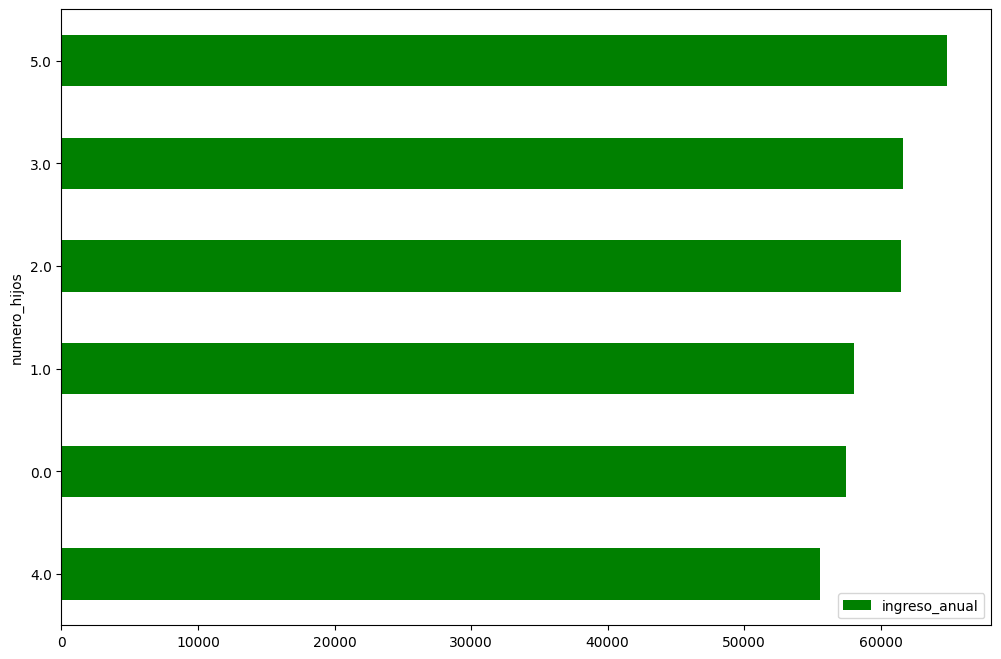

In [ ]:
cfm_2_hijos_ingresos_anuales = cfm_2.groupby('numero_hijos')[['ingreso_anual']].mean().sort_values('ingreso_anual')
cfm_2_hijos_ingresos_anuales.plot(kind='barh',figsize=(12,8), color = 'green')


Text(0, 0.5, 'Ingresos Anuales(Promedio)')

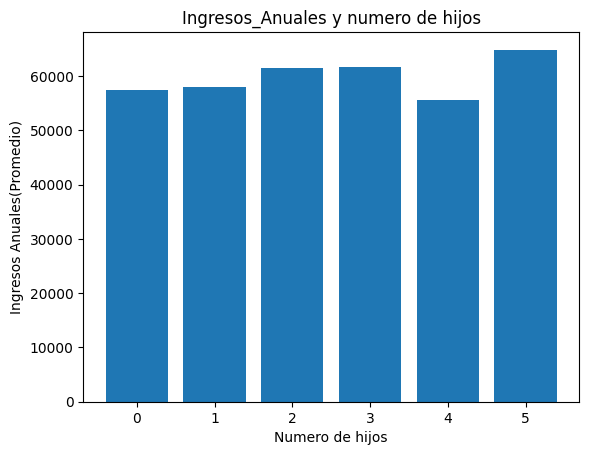

In [ ]:
grupo = cfm_2.groupby('numero_hijos')['ingreso_anual']
label = grupo.mean().index
valores = grupo.mean().values
plt.bar(label,valores)
plt.title('Ingresos_Anuales y numero de hijos')
plt.xlabel('Numero de hijos')
plt.ylabel('Ingresos Anuales(Promedio)')

Text(0, 0.5, 'Ingresos Anuales(Promedio)')

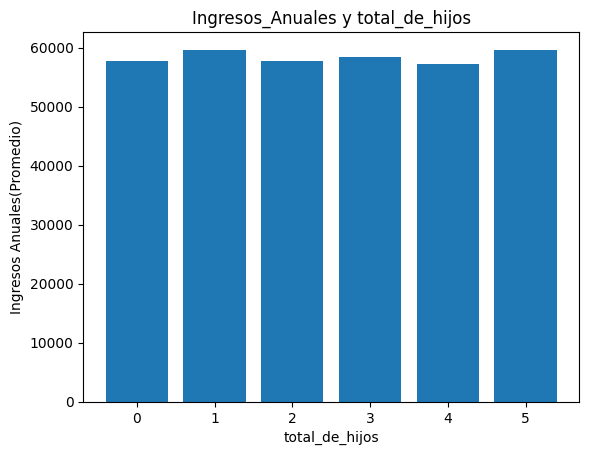

In [ ]:
grupo = cfm_2.groupby('total_de_hijos')['ingreso_anual']
label = grupo.mean().index
valores = grupo.mean().values
plt.bar(label,valores)
plt.title('Ingresos_Anuales y total_de_hijos')
plt.xlabel('total_de_hijos')
plt.ylabel('Ingresos Anuales(Promedio)')

<Axes: xlabel='numero_hijos', ylabel='ingreso_anual'>

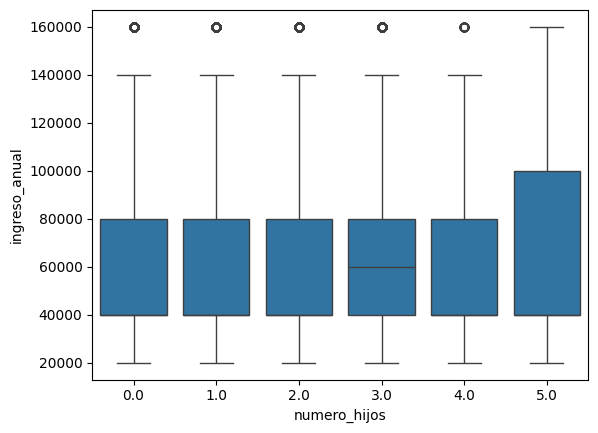

In [ ]:
sns.boxplot(x='numero_hijos', y='ingreso_anual', data=cfm_2)

In [ ]:
cfm_2.ingreso_anual.value_counts()

ingreso_anual
40000     19514
20000     12959
60000     10493
80000      7544
140000     3410
100000     2737
120000     2590
160000     1181
Name: count, dtype: int64

<Axes: >

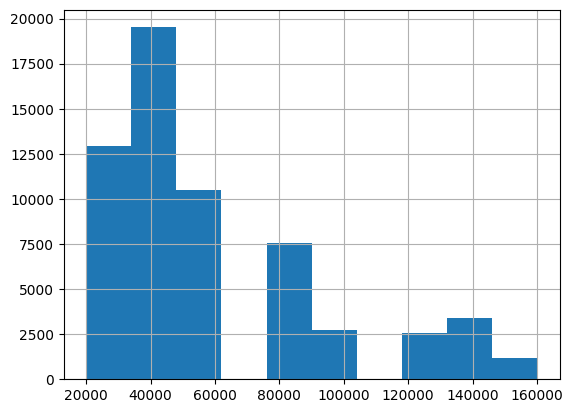

In [ ]:
#ingresos_anuales=cfm_2['ingreso_anual']
#ingresos_anuales.hist() otra forma es
cfm_2['ingreso_anual'].hist()

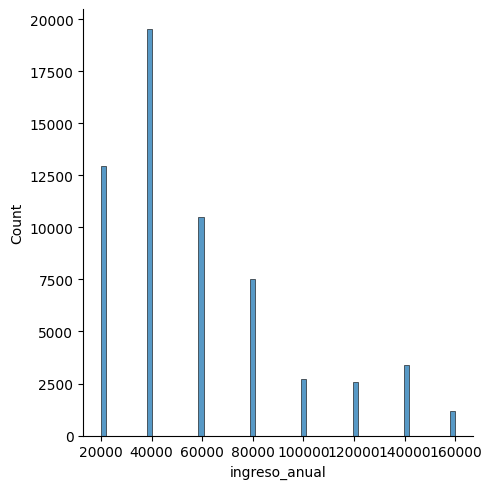

In [ ]:
sns.displot(data=cfm_2,x='ingreso_anual')

In [ ]:
cfm_2.categoria_alimento.value_counts()

categoria_alimento
Vegetales                       7440
Alimentos para picar            6919
Productos lácteos               3835
Carne                           3107
Fruta                           3080
Mermeladas y jaleas             2550
Productos para hornear          1947
Alimentos para el desayuno      1946
Pan                             1797
Sopa enlatada                   1722
Cerveza y vino                  1590
Productos de papel              1568
Productos de baño               1552
Eléctrico                       1544
Dulces                          1538
Postres congelados              1446
Especialidades                  1174
Alimentos ricos en almidón      1103
Revistas                         971
Productos de cocina              969
Huevos                           952
Bebidas calientes                891
Higiene                          831
Analgésicos                      828
Pizza                            821
Bebidas carbonatadas             782
Bebidas de jugo pur

Text(0.5, 1.0, 'Distribuciones CATEGORIA DE ALIMENTOS')

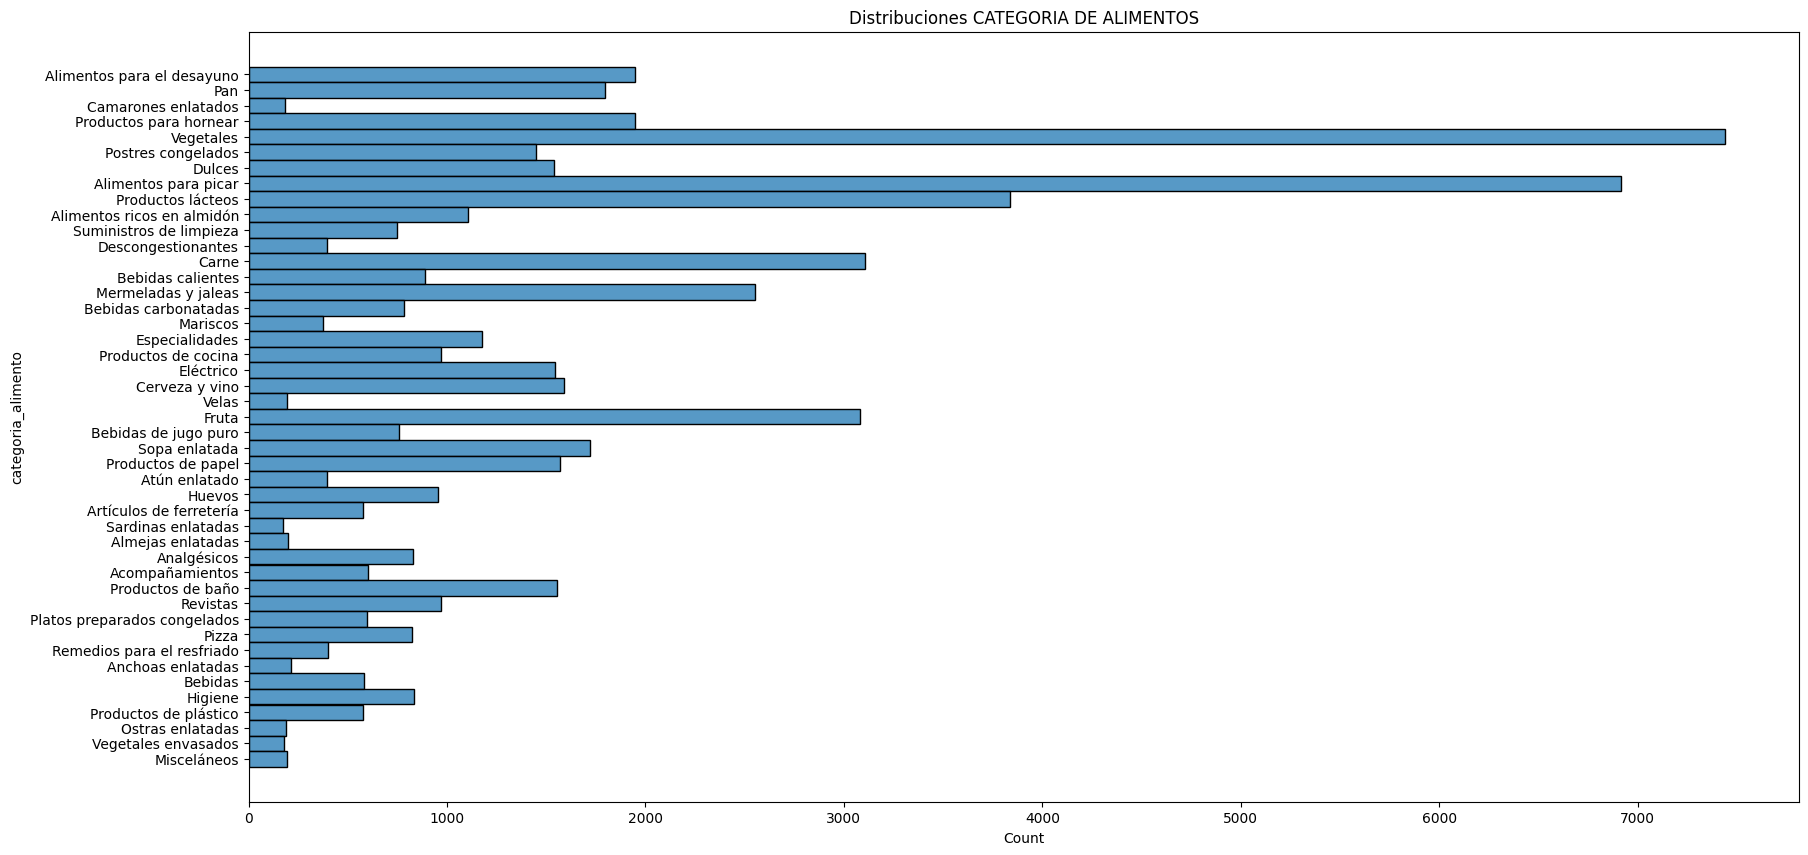

In [ ]:
plt.rc('figure',figsize =(20,10))
sns.histplot(data=cfm_2, y='categoria_alimento')
plt.title('Distribuciones CATEGORIA DE ALIMENTOS')
#cfm_2['categoria_alimento'].hist()

In [ ]:
cfm_2.numero_hijos.value_counts()

numero_hijos
0.0    37609
1.0     8811
2.0     5841
3.0     4391
4.0     2430
5.0     1346
Name: count, dtype: int64

<Axes: >

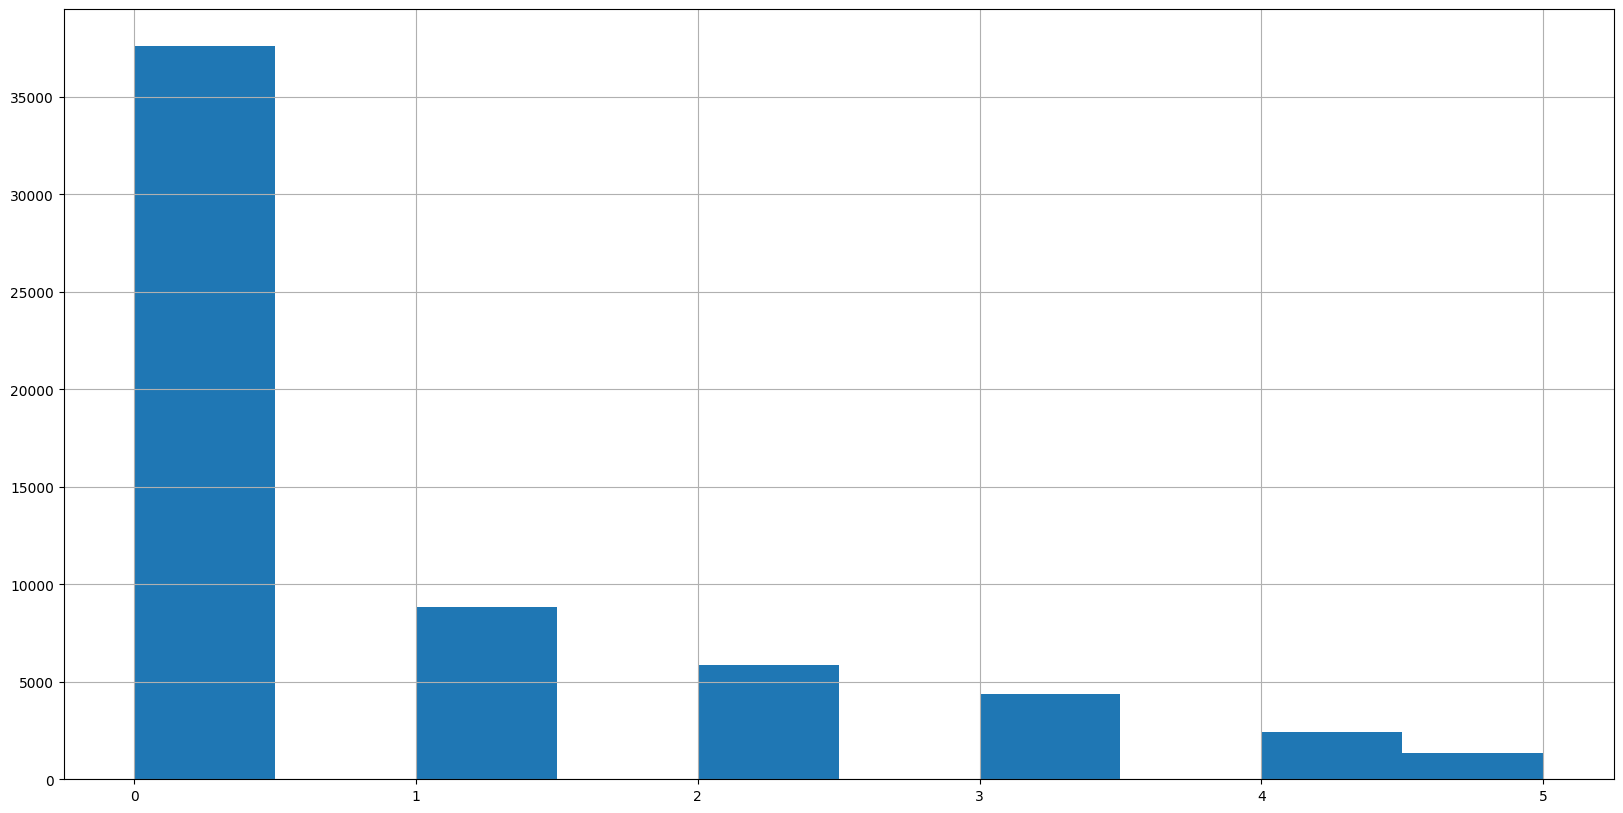

In [ ]:
cfm_2['numero_hijos'].hist()

In [ ]:
cfm_2.estado_civil.value_counts()

estado_civil
Soltero    30355
Casado     30073
Name: count, dtype: int64

<Axes: >

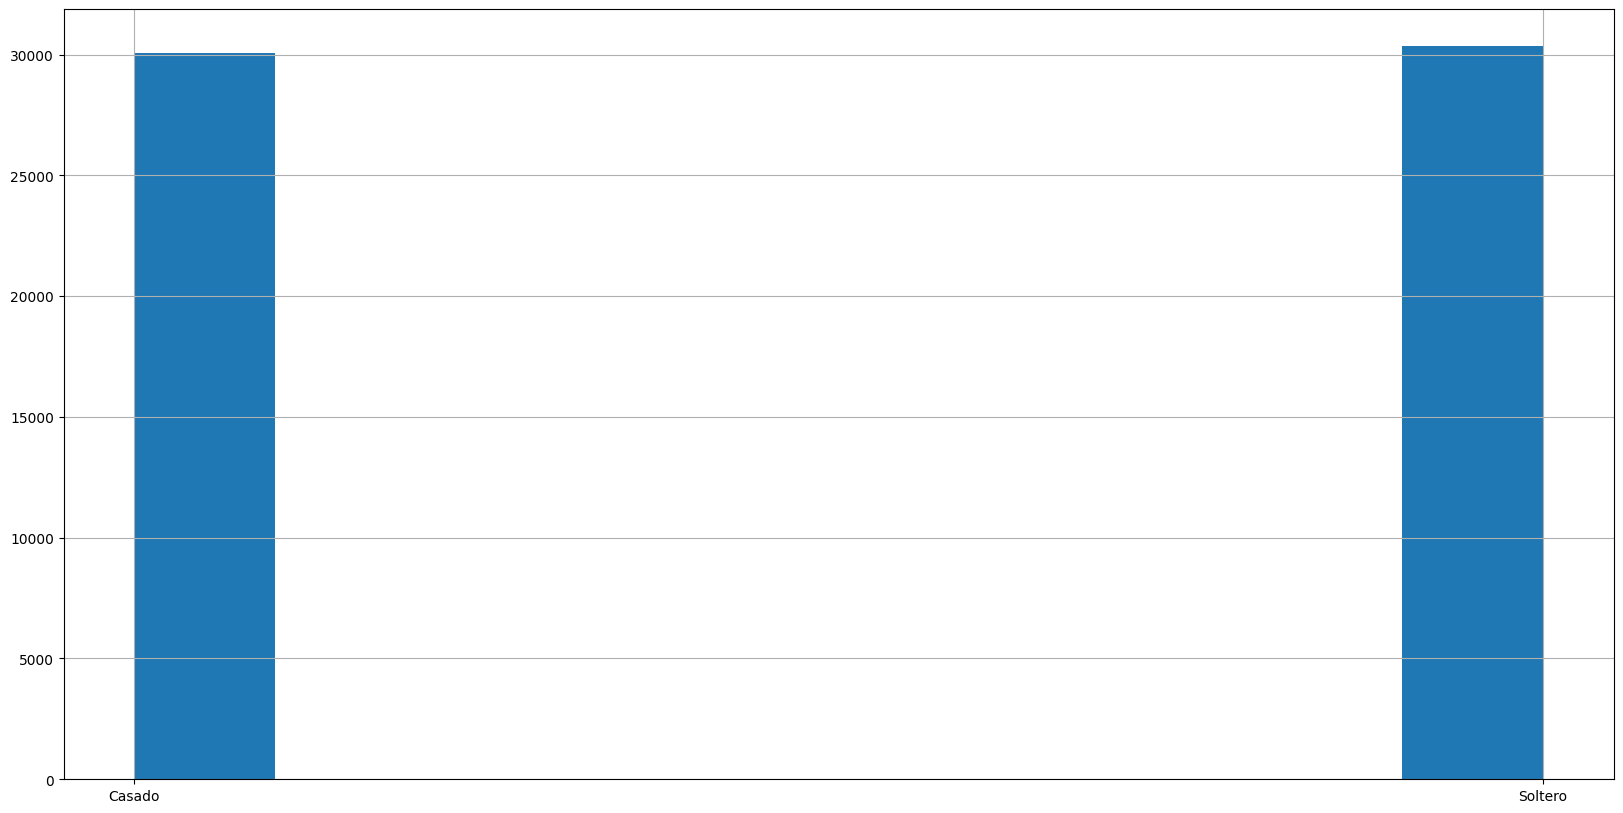

In [ ]:
cfm_2['estado_civil'].hist()

In [ ]:
cfm_2.genero.value_counts()

genero
Femenino     30942
Masculino    29486
Name: count, dtype: int64

<Axes: >

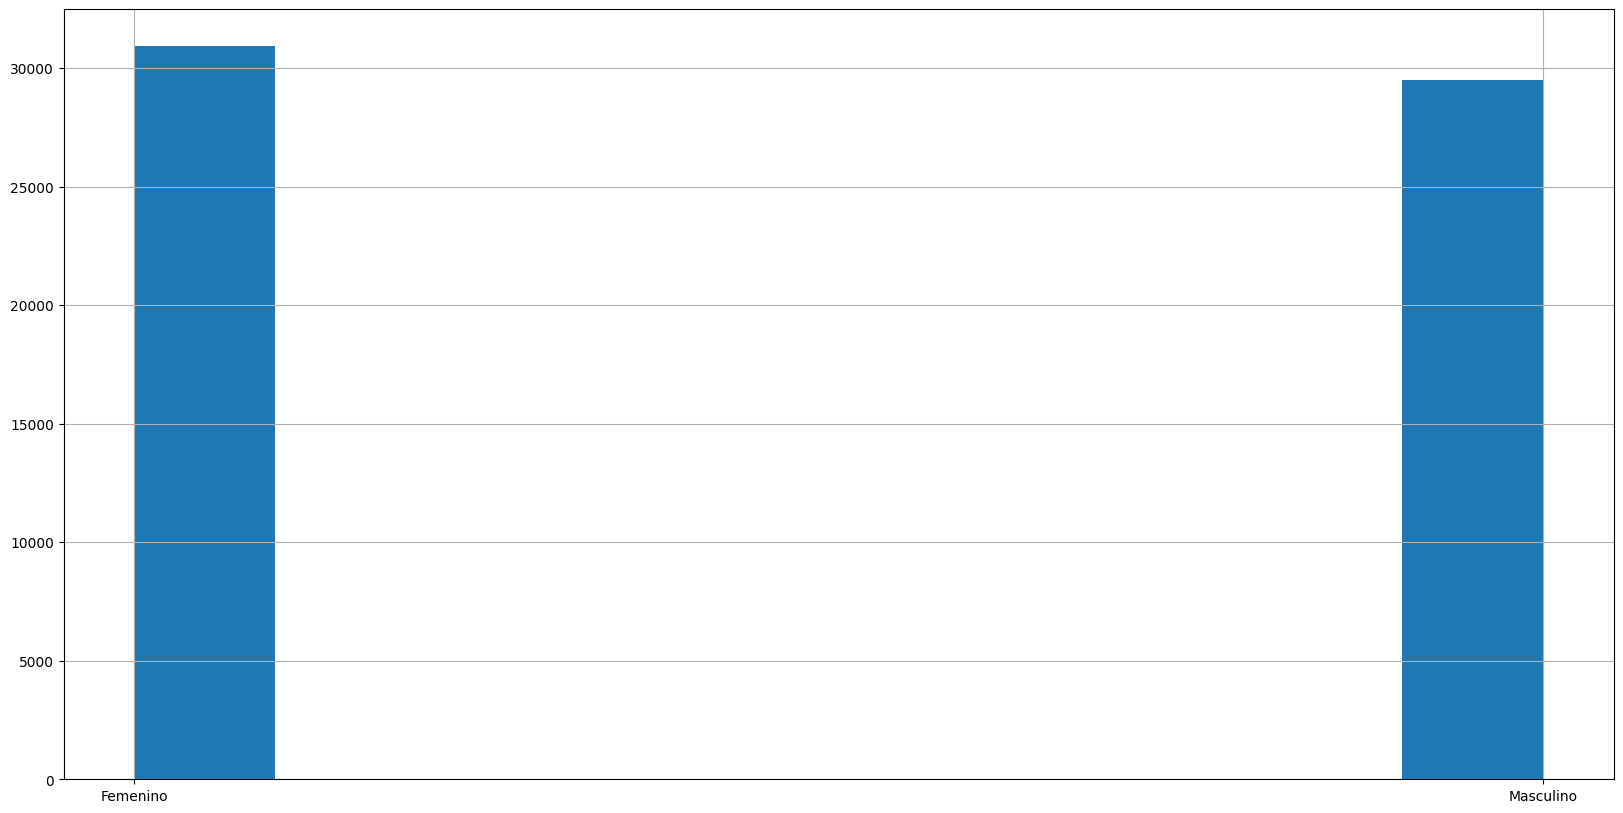

In [ ]:
cfm_2['genero'].hist()

In [ ]:
cfm_2.miembro.value_counts()

miembro
Bronce    33807
Normal    13867
Oro        7556
Plata      5198
Name: count, dtype: int64

<Axes: >

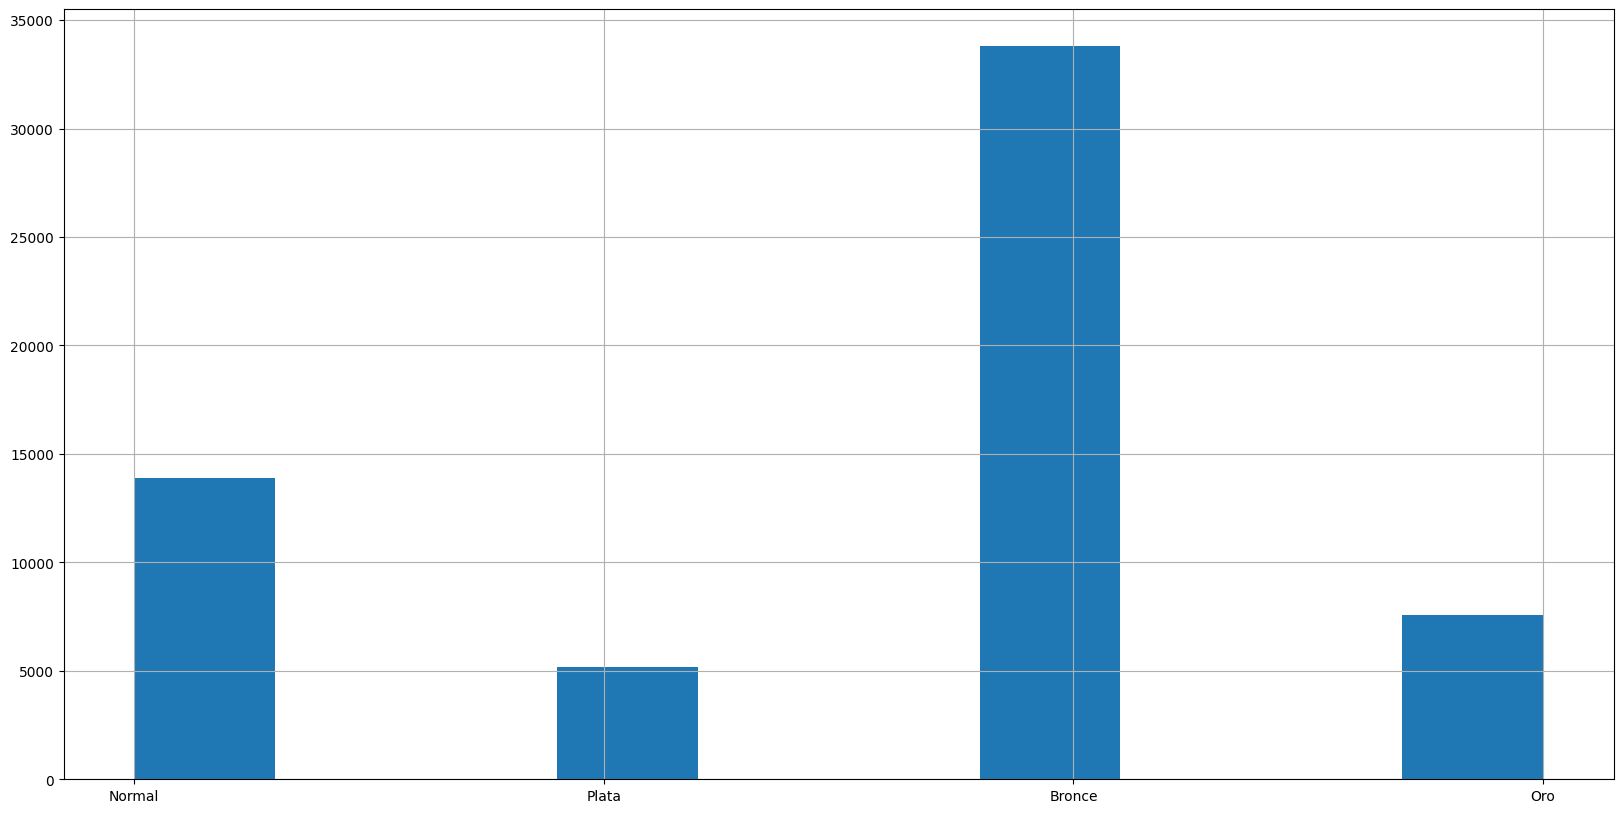

In [ ]:
cfm_2['miembro'].hist()

In [ ]:
cfm_2.ocupacion.value_counts()

ocupacion
Profesional         19915
Técnico             15995
Obrero              14624
Gestión              8805
Cargo de Oficina     1089
Name: count, dtype: int64

<Axes: >

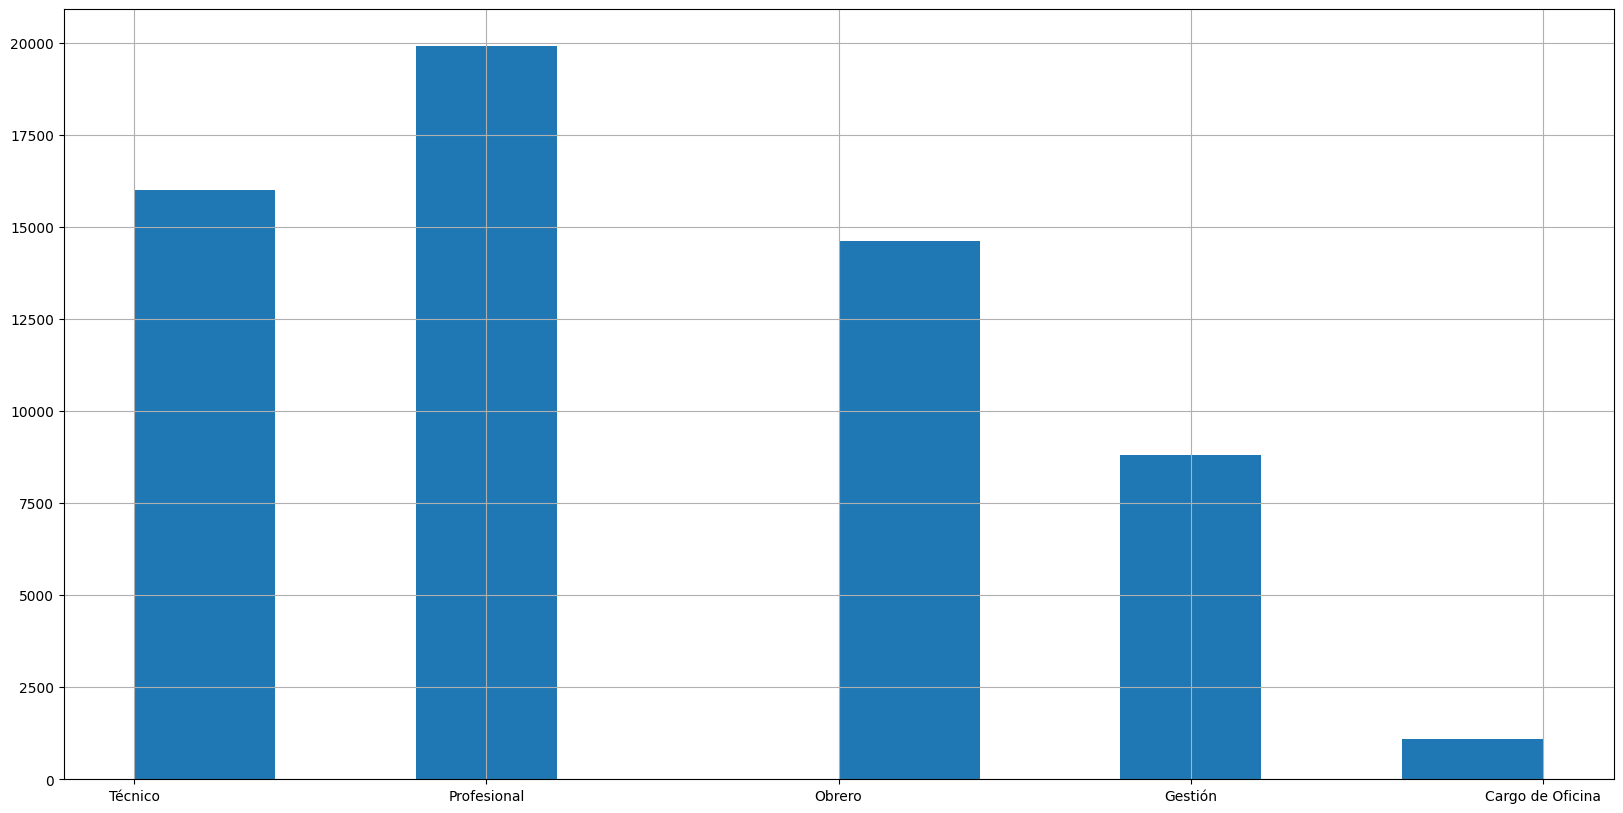

In [ ]:
cfm_2['ocupacion'].hist()

In [ ]:
cfm_2.escolaridad.value_counts()

escolaridad
Primaria      18201
Secundaria    17838
Superior      15994
Técnico        5284
Maestría       3111
Name: count, dtype: int64

<Axes: >

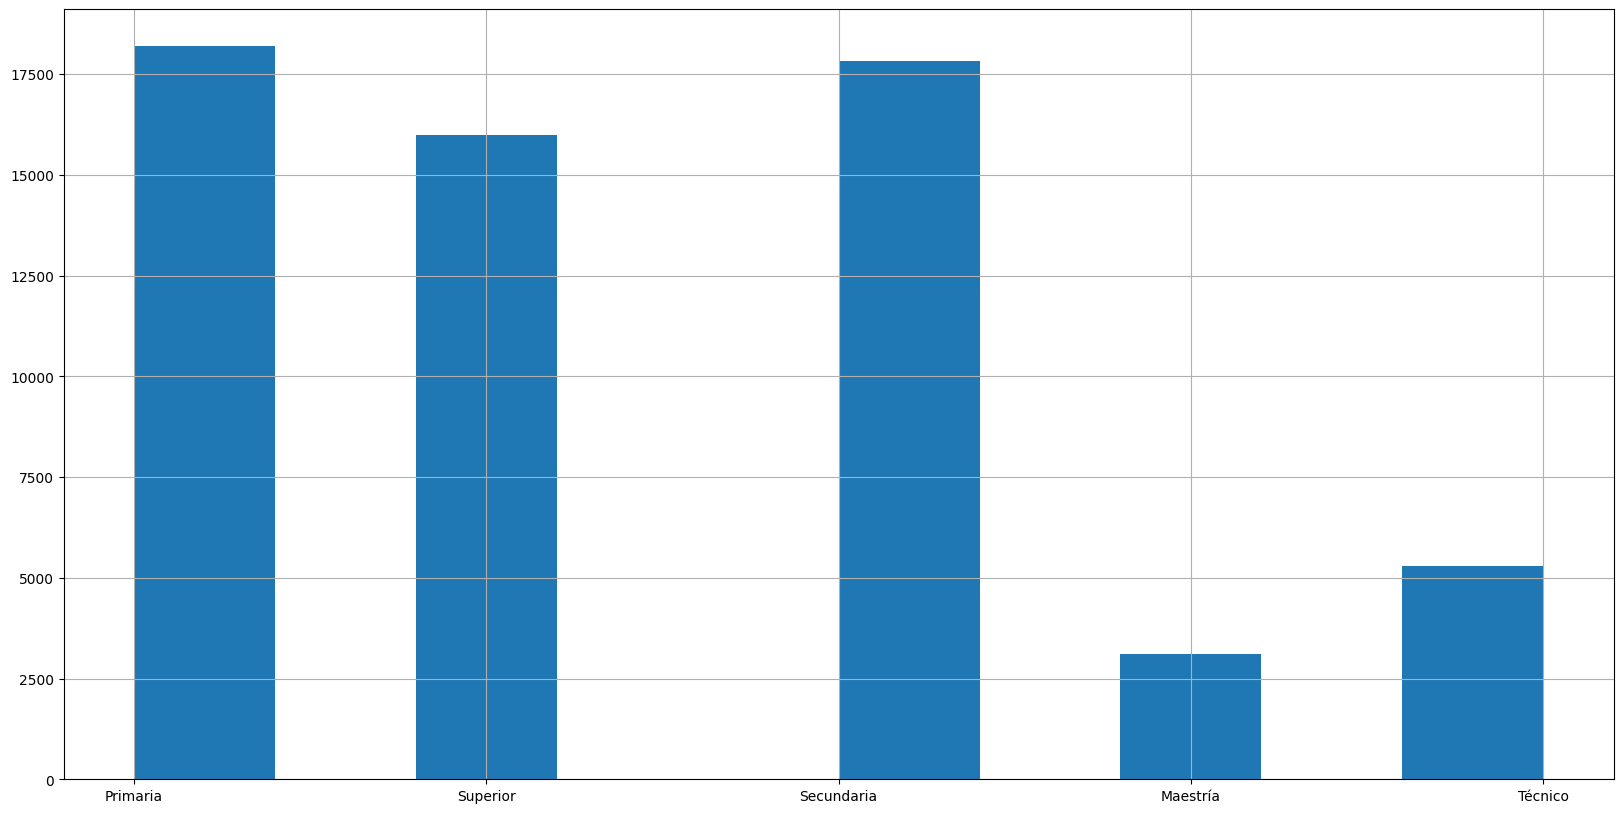

In [ ]:
cfm_2['escolaridad'].hist()

In [ ]:
cfm_2.pais.value_counts()

pais
Estados Unidos    38892
México            17572
Canadá             3964
Name: count, dtype: int64

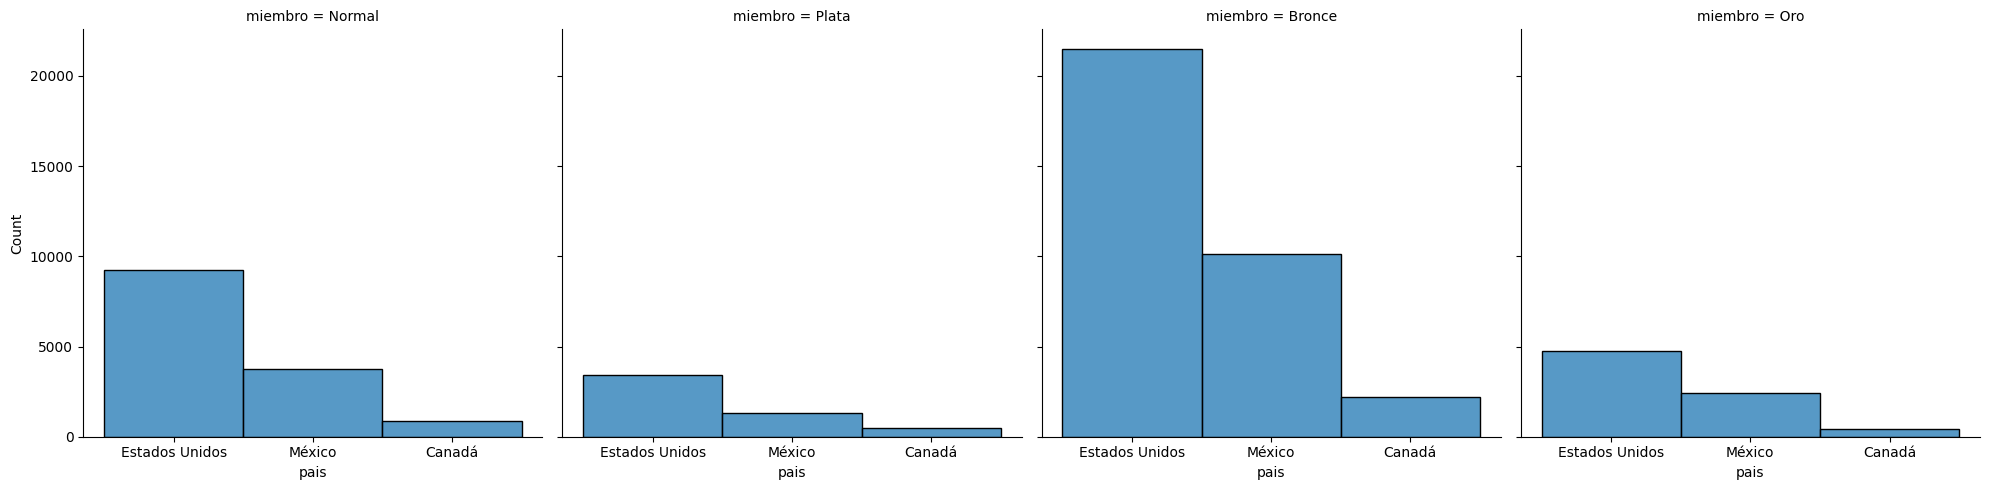

In [ ]:
sns.displot(data=cfm_2, x='pais', col='miembro',multiple='stack');

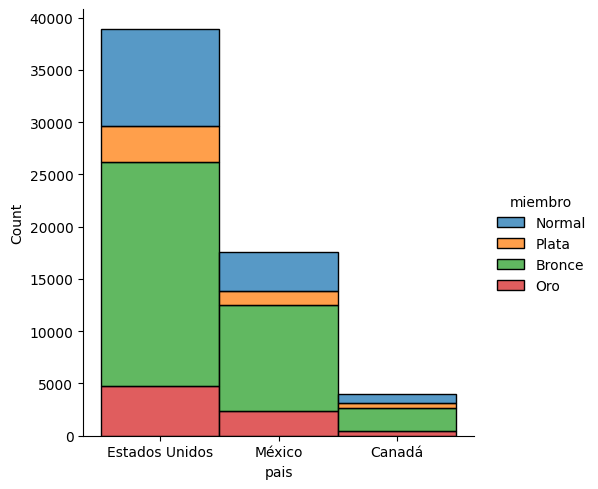

In [ ]:
sns.displot(data=cfm_2, x='pais', hue='miembro',multiple='stack');

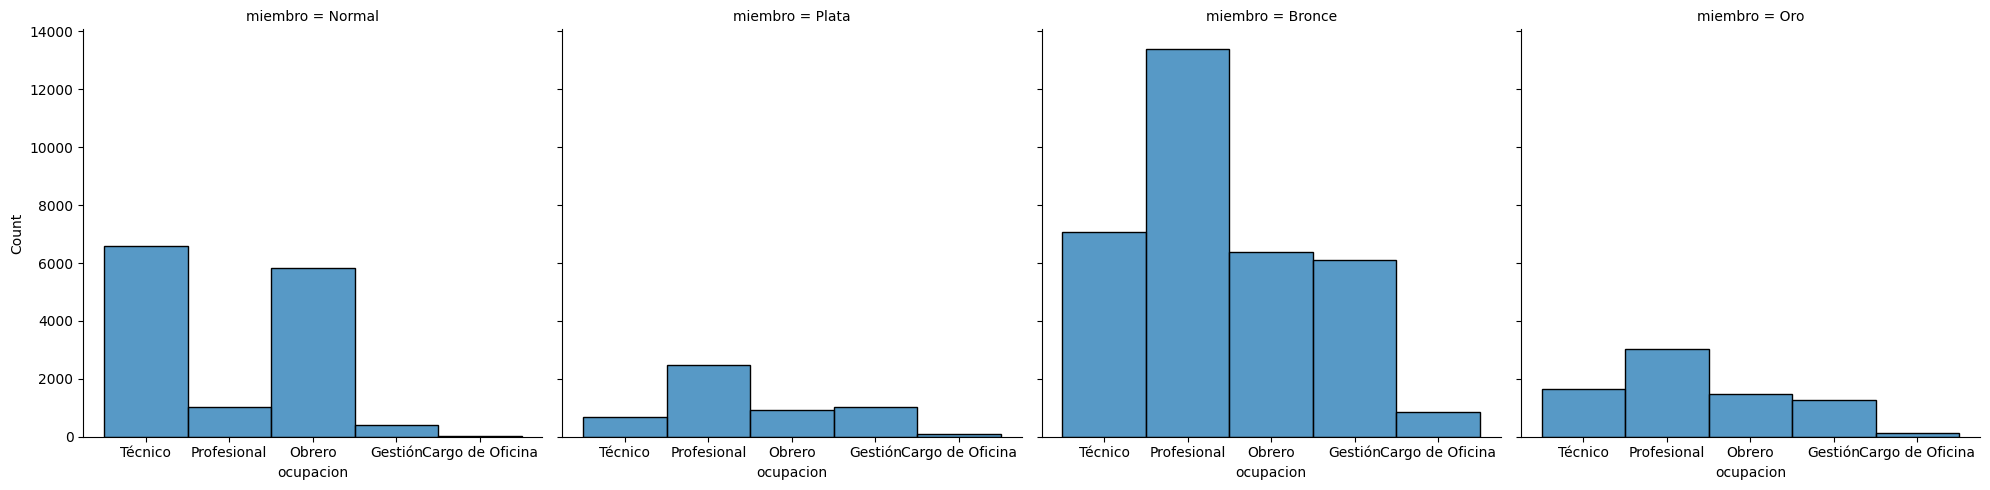

In [ ]:
sns.displot(data=cfm_2, x='ocupacion', col='miembro',multiple='stack');

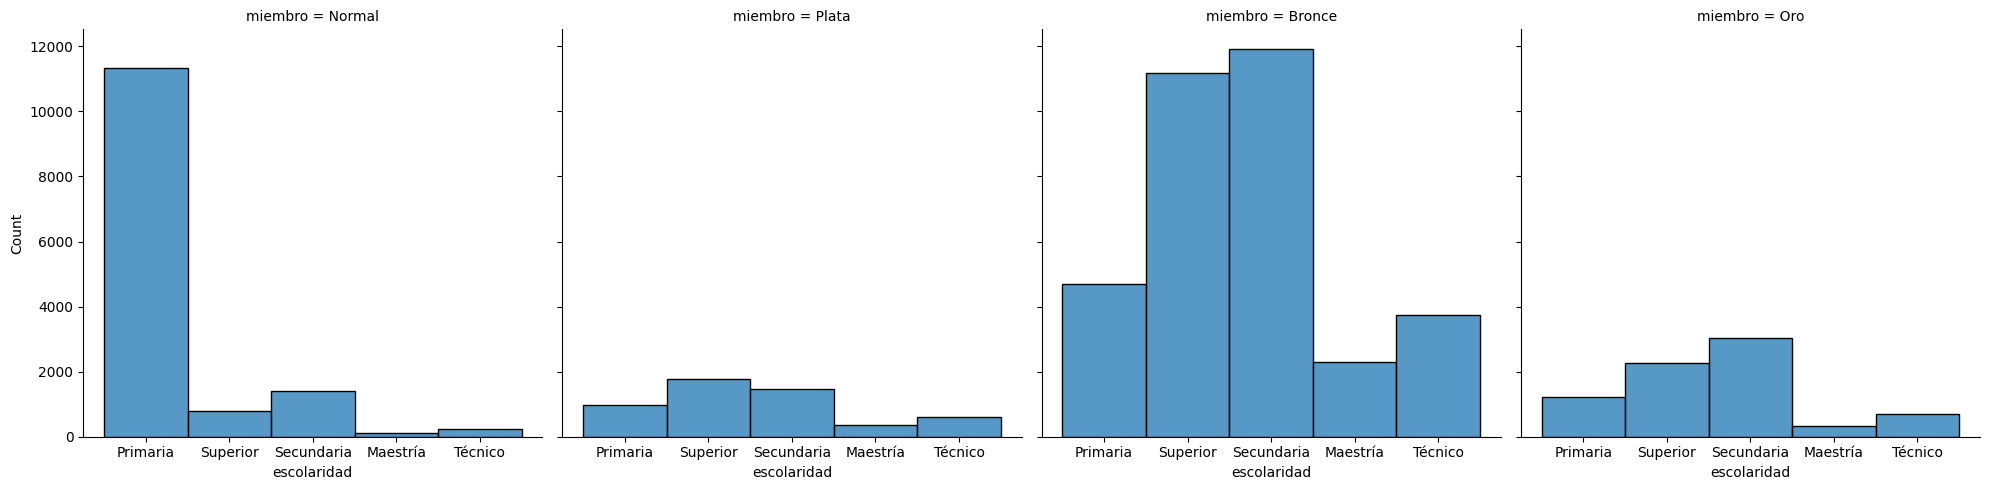

In [ ]:
sns.displot(data=cfm_2, x='escolaridad', col='miembro',multiple='stack');

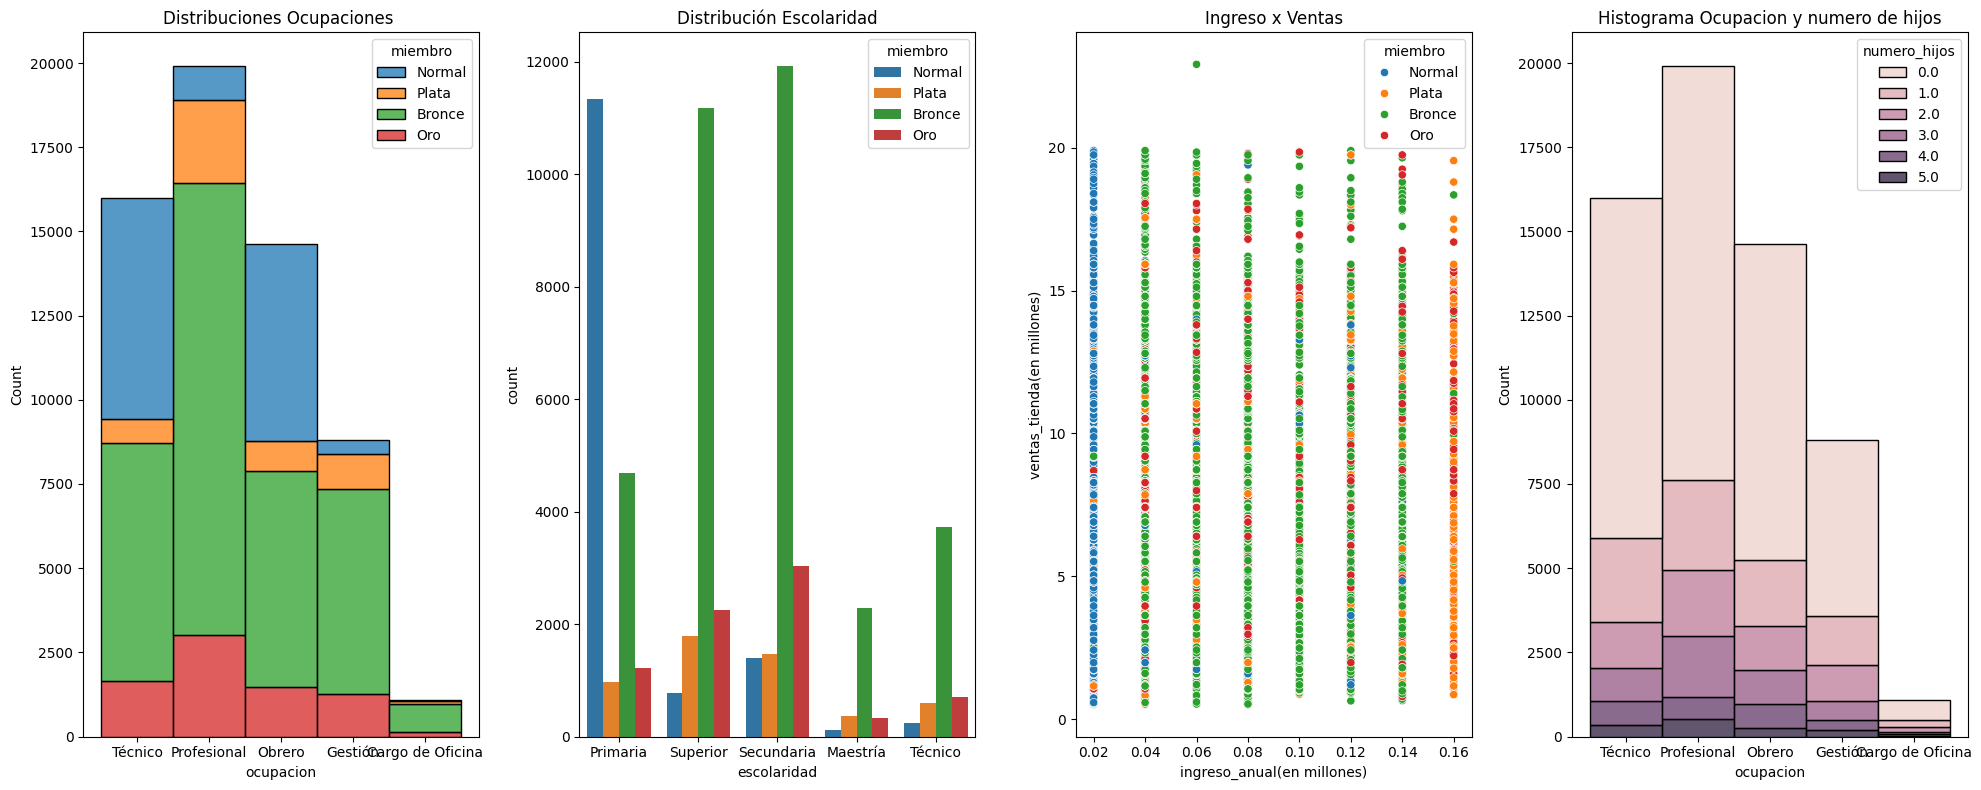

In [ ]:
from tables import group
fig, (g1, g2, g3, g4) = plt.subplots(1, 4,  figsize=(20, 8))


# Crear Graficos

sns.histplot(data=cfm_2, x='ocupacion', hue='miembro', ax=g1, multiple="stack")
g1.set_title('Distribuciones Ocupaciones ')

sns.countplot(data=cfm_2, x='escolaridad',hue='miembro', ax=g2) #multiple="stack")
#sns.distplot(data=cfm_2, x='escolaridad', hue='miembro', ax=g2)
g2.set_title('Distribución Escolaridad')

#datos_g3 = cfm_2.ingreso_anual.sample(100)
#datos_g3.index = range(datos_g3.shape[0])
#g3.plot(datos_g3)
#g3.set_title('Muestra (Ingresos)')

sns.scatterplot(data=cfm_2, x="ingreso_anual(en millones)", y="ventas_tienda(en millones)", hue="miembro", ax=g3)
#sns.scatterplot(data=cfm_2, x="ingreso_anual", y="ventas_tienda(en millones)", hue="miembro", ax=g3)
g3.set_title("Ingreso x Ventas")

sns.histplot(data=cfm_2, x='ocupacion', hue='numero_hijos', ax=g4, multiple="stack")
g4.set_title('Histograma Ocupacion y numero de hijos')

plt.tight_layout()
plt.show()


#4. Preprocesamiento y Obtención de Features

Preprocesamiento
1. En esta fase es importante utilizar una forma de codificar las variables categóricas para que el modelo de clusterización las pueda reconocer. Puedes usar one-hot-encoder, get_dummies, o establecer un valor numérico para las variables de acuerdo con tu percepción; por ejemplo, si queremos categorizar primaria, secundaria y universidad, podríamos decir que el valor numérico para primaria podría ser 1, el valor numérico para secundaria, 2, y así sucesivamente. (Es importante aclarar que en ejemplo citado, asignamos los valores a cada nivel porque sabemos que primaria es menor que secundaria, y secundaria menor que universidad)

2. Tras establecer un método de codificación para tus variables categóricas, debes reemplazar los valores numéricos asignados en el dataset para sustituir las cadenas de texto.

Tip: La pregunta que te debes estar haciendo es: ¿Será que tengo que codificar todas las columnas categóricas del dataset? La respuesta es no; únicamente codifica las columnas que tu consideres que puedan ser relevantes para la clusterización.

3. Teniendo en cuenta el paso anterior, debes en efecto seleccionar las variables que sean más relevantes para el caso de estudio: Se desea agrupar a los clientes en diversos clusters para entender sus características y brindarles el mejor servicio.

4. Con tus atributos seleccionados, al menos 6 y máximo 12, procederemos a estandarizar nuestros datos (que en este punto deben ser todos numéricos) para que todas las variables puedan ser tenidas en cuenta dentro de una misma escala. Varios de los hiperparámetros utilizados en las funciones de un modelo de Machine Learning asumen que todas las características están centradas alrededor de 0 y tienen varianza en el mismo orden. Si uno de los atributos del dataset tiene una varianza con orden de magnitud muy superior al de los demás atributos, puede dominar la función del modelo y hacer que el estimador no aprenda correctamente de los otros atributos como se espera. Vamos a utilizar con el StandardScaler. Puedes almacenar los valores estandarizados en una variable llamada X_std , por ejemplo.

¡Vas a obtener un numpy array listo para avanzar a la próxima fase!

In [ ]:
import datetime
import numpy as np


In [ ]:
cfm_2.head()

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,total_de_hijos,escolaridad,miembro,ocupacion,vivienda_propia,promedio_autos(aprox),ingreso_anual,numero_hijos,promedio_autos(aprox).1,marca,precio_recomendado,peso_bruto,peso_neto,empaque_reciclable,bajo_en_grasa,unidades_por_caja,comercio,ciudad,estado,pies_cuadrados_tienda,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo,ingreso_anual(en millones)
0,Alimentos para el desayuno,Alimentos congelados,Comida,7.36,2.7232,4.0,Bolsas llenas,Estados Unidos,Casado,Femenino,1.0,Primaria,Normal,Técnico,Sí,1.0,20000,1.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",126.62,0.02
1,Alimentos para el desayuno,Alimentos congelados,Comida,5.52,2.5944,3.0,Lotería de la caja registradora,Estados Unidos,Casado,Masculino,0.0,Superior,Plata,Profesional,Sí,4.0,60000,0.0,4.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",59.86,0.06
2,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.3616,2.0,Ahorro para apostadores grandes,Estados Unidos,Soltero,Femenino,4.0,Primaria,Normal,Obrero,No,1.0,20000,0.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",84.16,0.02
3,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.1776,2.0,Lotería de la caja registradora,Estados Unidos,Casado,Femenino,2.0,Secundaria,Bronce,Obrero,Sí,2.0,40000,2.0,2.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Cupón en la tienda,95.78,0.04
4,Alimentos para el desayuno,Alimentos congelados,Comida,4.08,1.4280,3.0,Venta Doble,Estados Unidos,Casado,Masculino,0.0,Primaria,Bronce,Técnico,No,2.0,40000,0.0,2.0,Golden,1.36,7.12,5.11,0.0,1.0,29.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79,0.04


In [ ]:
cfm_3=cfm_2.copy()
cfm_3.head()

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,total_de_hijos,escolaridad,miembro,ocupacion,vivienda_propia,promedio_autos(aprox),ingreso_anual,numero_hijos,promedio_autos(aprox).1,marca,precio_recomendado,peso_bruto,peso_neto,empaque_reciclable,bajo_en_grasa,unidades_por_caja,comercio,ciudad,estado,pies_cuadrados_tienda,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo,ingreso_anual(en millones)
0,Alimentos para el desayuno,Alimentos congelados,Comida,7.36,2.7232,4.0,Bolsas llenas,Estados Unidos,Casado,Femenino,1.0,Primaria,Normal,Técnico,Sí,1.0,20000,1.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",126.62,0.02
1,Alimentos para el desayuno,Alimentos congelados,Comida,5.52,2.5944,3.0,Lotería de la caja registradora,Estados Unidos,Casado,Masculino,0.0,Superior,Plata,Profesional,Sí,4.0,60000,0.0,4.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",59.86,0.06
2,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.3616,2.0,Ahorro para apostadores grandes,Estados Unidos,Soltero,Femenino,4.0,Primaria,Normal,Obrero,No,1.0,20000,0.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",84.16,0.02
3,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.1776,2.0,Lotería de la caja registradora,Estados Unidos,Casado,Femenino,2.0,Secundaria,Bronce,Obrero,Sí,2.0,40000,2.0,2.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Cupón en la tienda,95.78,0.04
4,Alimentos para el desayuno,Alimentos congelados,Comida,4.08,1.4280,3.0,Venta Doble,Estados Unidos,Casado,Masculino,0.0,Primaria,Bronce,Técnico,No,2.0,40000,0.0,2.0,Golden,1.36,7.12,5.11,0.0,1.0,29.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79,0.04


In [ ]:
cfm_3.escolaridad.value_counts().index

Index(['Primaria', 'Secundaria', 'Superior', 'Técnico', 'Maestría'], dtype='object', name='escolaridad')

In [ ]:
codi_escolaridad = {'Primaria':1,'Secundaria': 2, 'Superior': 3, 'Técnico': 4, 'Maestría': 5 }
cfm_3['escolaridad'] = cfm_3['escolaridad'].map(codi_escolaridad)
cfm_3.head()

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,total_de_hijos,escolaridad,miembro,ocupacion,vivienda_propia,promedio_autos(aprox),ingreso_anual,numero_hijos,promedio_autos(aprox).1,marca,precio_recomendado,peso_bruto,peso_neto,empaque_reciclable,bajo_en_grasa,unidades_por_caja,comercio,ciudad,estado,pies_cuadrados_tienda,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo,ingreso_anual(en millones)
0,Alimentos para el desayuno,Alimentos congelados,Comida,7.36,2.7232,4.0,Bolsas llenas,Estados Unidos,Casado,Femenino,1.0,1,Normal,Técnico,Sí,1.0,20000,1.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",126.62,0.02
1,Alimentos para el desayuno,Alimentos congelados,Comida,5.52,2.5944,3.0,Lotería de la caja registradora,Estados Unidos,Casado,Masculino,0.0,3,Plata,Profesional,Sí,4.0,60000,0.0,4.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",59.86,0.06
2,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.3616,2.0,Ahorro para apostadores grandes,Estados Unidos,Soltero,Femenino,4.0,1,Normal,Obrero,No,1.0,20000,0.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",84.16,0.02
3,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.1776,2.0,Lotería de la caja registradora,Estados Unidos,Casado,Femenino,2.0,2,Bronce,Obrero,Sí,2.0,40000,2.0,2.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Cupón en la tienda,95.78,0.04
4,Alimentos para el desayuno,Alimentos congelados,Comida,4.08,1.4280,3.0,Venta Doble,Estados Unidos,Casado,Masculino,0.0,1,Bronce,Técnico,No,2.0,40000,0.0,2.0,Golden,1.36,7.12,5.11,0.0,1.0,29.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79,0.04


In [ ]:
cfm_3.ocupacion.value_counts().index


Index(['Profesional', 'Técnico', 'Obrero', 'Gestión', 'Cargo de Oficina'], dtype='object', name='ocupacion')

In [ ]:
codi_ocupacion = {'Profesional': 1, 'Técnico': 2, 'Obrero': 3, 'Gestión': 4 ,'Cargo de Oficina':5 }
cfm_3['ocupacion'] = cfm_3['ocupacion'].map(codi_ocupacion)
cfm_3.head()


,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,total_de_hijos,escolaridad,miembro,ocupacion,vivienda_propia,promedio_autos(aprox),ingreso_anual,numero_hijos,promedio_autos(aprox).1,marca,precio_recomendado,peso_bruto,peso_neto,empaque_reciclable,bajo_en_grasa,unidades_por_caja,comercio,ciudad,estado,pies_cuadrados_tienda,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo,ingreso_anual(en millones)
0,Alimentos para el desayuno,Alimentos congelados,Comida,7.36,2.7232,4.0,Bolsas llenas,Estados Unidos,Casado,Femenino,1.0,1,Normal,2,Sí,1.0,20000,1.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",126.62,0.02
1,Alimentos para el desayuno,Alimentos congelados,Comida,5.52,2.5944,3.0,Lotería de la caja registradora,Estados Unidos,Casado,Masculino,0.0,3,Plata,1,Sí,4.0,60000,0.0,4.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",59.86,0.06
2,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.3616,2.0,Ahorro para apostadores grandes,Estados Unidos,Soltero,Femenino,4.0,1,Normal,3,No,1.0,20000,0.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",84.16,0.02
3,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.1776,2.0,Lotería de la caja registradora,Estados Unidos,Casado,Femenino,2.0,2,Bronce,3,Sí,2.0,40000,2.0,2.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Cupón en la tienda,95.78,0.04
4,Alimentos para el desayuno,Alimentos congelados,Comida,4.08,1.4280,3.0,Venta Doble,Estados Unidos,Casado,Masculino,0.0,1,Bronce,2,No,2.0,40000,0.0,2.0,Golden,1.36,7.12,5.11,0.0,1.0,29.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79,0.04


In [ ]:
cfm_3.loc[cfm_3.escolaridad==1].ocupacion.value_counts()


ocupacion
2    7993
3    7262
1    1815
4    1131
Name: count, dtype: int64

In [ ]:
cfm_3.miembro.value_counts().index
#cfm_3.loc[cfm_3.miembro=='Normal']


Index(['Bronce', 'Normal', 'Oro', 'Plata'], dtype='object', name='miembro')

In [ ]:
codi_miembro = {'Bronce': 1, 'Oro': 2, 'Plata': 3, 'Normal':4}
cfm_3['miembro'] = cfm_3['miembro'].map(codi_miembro)
cfm_3.head()


,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,total_de_hijos,escolaridad,miembro,ocupacion,vivienda_propia,promedio_autos(aprox),ingreso_anual,numero_hijos,promedio_autos(aprox).1,marca,precio_recomendado,peso_bruto,peso_neto,empaque_reciclable,bajo_en_grasa,unidades_por_caja,comercio,ciudad,estado,pies_cuadrados_tienda,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo,ingreso_anual(en millones)
0,Alimentos para el desayuno,Alimentos congelados,Comida,7.36,2.7232,4.0,Bolsas llenas,Estados Unidos,Casado,Femenino,1.0,1,4,2,Sí,1.0,20000,1.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",126.62,0.02
1,Alimentos para el desayuno,Alimentos congelados,Comida,5.52,2.5944,3.0,Lotería de la caja registradora,Estados Unidos,Casado,Masculino,0.0,3,3,1,Sí,4.0,60000,0.0,4.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",59.86,0.06
2,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.3616,2.0,Ahorro para apostadores grandes,Estados Unidos,Soltero,Femenino,4.0,1,4,3,No,1.0,20000,0.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",84.16,0.02
3,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.1776,2.0,Lotería de la caja registradora,Estados Unidos,Casado,Femenino,2.0,2,1,3,Sí,2.0,40000,2.0,2.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Cupón en la tienda,95.78,0.04
4,Alimentos para el desayuno,Alimentos congelados,Comida,4.08,1.4280,3.0,Venta Doble,Estados Unidos,Casado,Masculino,0.0,1,1,2,No,2.0,40000,0.0,2.0,Golden,1.36,7.12,5.11,0.0,1.0,29.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79,0.04


In [ ]:
cfm_3.genero.value_counts().index

Index(['Femenino', 'Masculino'], dtype='object', name='genero')

In [ ]:
codi_genero = {'Femenino': 1, 'Masculino': 2}
cfm_3['genero'] = cfm_3['genero'].map(codi_genero)
cfm_3.head()

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,total_de_hijos,escolaridad,miembro,ocupacion,vivienda_propia,promedio_autos(aprox),ingreso_anual,numero_hijos,promedio_autos(aprox).1,marca,precio_recomendado,peso_bruto,peso_neto,empaque_reciclable,bajo_en_grasa,unidades_por_caja,comercio,ciudad,estado,pies_cuadrados_tienda,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo,ingreso_anual(en millones)
0,Alimentos para el desayuno,Alimentos congelados,Comida,7.36,2.7232,4.0,Bolsas llenas,Estados Unidos,Casado,1,1.0,1,4,2,Sí,1.0,20000,1.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",126.62,0.02
1,Alimentos para el desayuno,Alimentos congelados,Comida,5.52,2.5944,3.0,Lotería de la caja registradora,Estados Unidos,Casado,2,0.0,3,3,1,Sí,4.0,60000,0.0,4.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",59.86,0.06
2,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.3616,2.0,Ahorro para apostadores grandes,Estados Unidos,Soltero,1,4.0,1,4,3,No,1.0,20000,0.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",84.16,0.02
3,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.1776,2.0,Lotería de la caja registradora,Estados Unidos,Casado,1,2.0,2,1,3,Sí,2.0,40000,2.0,2.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Cupón en la tienda,95.78,0.04
4,Alimentos para el desayuno,Alimentos congelados,Comida,4.08,1.4280,3.0,Venta Doble,Estados Unidos,Casado,2,0.0,1,1,2,No,2.0,40000,0.0,2.0,Golden,1.36,7.12,5.11,0.0,1.0,29.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79,0.04


In [ ]:
cfm_3.estado_civil.value_counts().index

Index(['Soltero', 'Casado'], dtype='object', name='estado_civil')

In [ ]:
codi_estado_civil = {'Soltero': 1, 'Casado': 2}
cfm_3['estado_civil'] = cfm_3['estado_civil'].map(codi_estado_civil)
cfm_3.head()

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,total_de_hijos,escolaridad,miembro,ocupacion,vivienda_propia,promedio_autos(aprox),ingreso_anual,numero_hijos,promedio_autos(aprox).1,marca,precio_recomendado,peso_bruto,peso_neto,empaque_reciclable,bajo_en_grasa,unidades_por_caja,comercio,ciudad,estado,pies_cuadrados_tienda,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo,ingreso_anual(en millones)
0,Alimentos para el desayuno,Alimentos congelados,Comida,7.36,2.7232,4.0,Bolsas llenas,Estados Unidos,2,1,1.0,1,4,2,Sí,1.0,20000,1.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",126.62,0.02
1,Alimentos para el desayuno,Alimentos congelados,Comida,5.52,2.5944,3.0,Lotería de la caja registradora,Estados Unidos,2,2,0.0,3,3,1,Sí,4.0,60000,0.0,4.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",59.86,0.06
2,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.3616,2.0,Ahorro para apostadores grandes,Estados Unidos,1,1,4.0,1,4,3,No,1.0,20000,0.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",84.16,0.02
3,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.1776,2.0,Lotería de la caja registradora,Estados Unidos,2,1,2.0,2,1,3,Sí,2.0,40000,2.0,2.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Cupón en la tienda,95.78,0.04
4,Alimentos para el desayuno,Alimentos congelados,Comida,4.08,1.4280,3.0,Venta Doble,Estados Unidos,2,2,0.0,1,1,2,No,2.0,40000,0.0,2.0,Golden,1.36,7.12,5.11,0.0,1.0,29.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79,0.04


In [ ]:
cfm_3.pais.value_counts().index


Index(['Estados Unidos', 'México', 'Canadá'], dtype='object', name='pais')

In [ ]:
codi_pais = {'Estados Unidos': 1, 'México': 2,'Canadá': 3}
cfm_3['pais'] = cfm_3['pais'].map(codi_pais)
cfm_3.head()

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,total_de_hijos,escolaridad,miembro,ocupacion,vivienda_propia,promedio_autos(aprox),ingreso_anual,numero_hijos,promedio_autos(aprox).1,marca,precio_recomendado,peso_bruto,peso_neto,empaque_reciclable,bajo_en_grasa,unidades_por_caja,comercio,ciudad,estado,pies_cuadrados_tienda,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo,ingreso_anual(en millones)
0,Alimentos para el desayuno,Alimentos congelados,Comida,7.36,2.7232,4.0,Bolsas llenas,1,2,1,1.0,1,4,2,Sí,1.0,20000,1.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",126.62,0.02
1,Alimentos para el desayuno,Alimentos congelados,Comida,5.52,2.5944,3.0,Lotería de la caja registradora,1,2,2,0.0,3,3,1,Sí,4.0,60000,0.0,4.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",59.86,0.06
2,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.3616,2.0,Ahorro para apostadores grandes,1,1,1,4.0,1,4,3,No,1.0,20000,0.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",84.16,0.02
3,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.1776,2.0,Lotería de la caja registradora,1,2,1,2.0,2,1,3,Sí,2.0,40000,2.0,2.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Cupón en la tienda,95.78,0.04
4,Alimentos para el desayuno,Alimentos congelados,Comida,4.08,1.4280,3.0,Venta Doble,1,2,2,0.0,1,1,2,No,2.0,40000,0.0,2.0,Golden,1.36,7.12,5.11,0.0,1.0,29.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79,0.04


In [ ]:
cfm_3.tipo.value_counts().index

Index(['Comida', 'No comestible', 'Bebida'], dtype='object', name='tipo')

In [ ]:
codi_tipo = {'Comida': 1, 'No comestible': 2,'Bebida': 3}
cfm_3['tipo'] = cfm_3['tipo'].map(codi_tipo)
cfm_3.head()

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,total_de_hijos,escolaridad,miembro,ocupacion,vivienda_propia,promedio_autos(aprox),ingreso_anual,numero_hijos,promedio_autos(aprox).1,marca,precio_recomendado,peso_bruto,peso_neto,empaque_reciclable,bajo_en_grasa,unidades_por_caja,comercio,ciudad,estado,pies_cuadrados_tienda,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo,ingreso_anual(en millones)
0,Alimentos para el desayuno,Alimentos congelados,1,7.36,2.7232,4.0,Bolsas llenas,1,2,1,1.0,1,4,2,Sí,1.0,20000,1.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",126.62,0.02
1,Alimentos para el desayuno,Alimentos congelados,1,5.52,2.5944,3.0,Lotería de la caja registradora,1,2,2,0.0,3,3,1,Sí,4.0,60000,0.0,4.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",59.86,0.06
2,Alimentos para el desayuno,Alimentos congelados,1,3.68,1.3616,2.0,Ahorro para apostadores grandes,1,1,1,4.0,1,4,3,No,1.0,20000,0.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",84.16,0.02
3,Alimentos para el desayuno,Alimentos congelados,1,3.68,1.1776,2.0,Lotería de la caja registradora,1,2,1,2.0,2,1,3,Sí,2.0,40000,2.0,2.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Cupón en la tienda,95.78,0.04
4,Alimentos para el desayuno,Alimentos congelados,1,4.08,1.4280,3.0,Venta Doble,1,2,2,0.0,1,1,2,No,2.0,40000,0.0,2.0,Golden,1.36,7.12,5.11,0.0,1.0,29.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79,0.04


In [ ]:
cfm_3=cfm_3[['miembro','ocupacion','escolaridad','genero','estado_civil','pais','tipo','ingreso_anual(en millones)','ventas_tienda(en millones)','ingreso_anual']]
cfm_3


,miembro,ocupacion,escolaridad,genero,estado_civil,pais,tipo,ingreso_anual(en millones),ventas_tienda(en millones),ingreso_anual
0,4,2,1,1,2,1,1,0.02,7.36,20000
1,3,1,3,2,2,1,1,0.06,5.52,60000
2,4,3,1,1,1,1,1,0.02,3.68,20000
3,1,3,2,1,2,1,1,0.04,3.68,40000
4,1,2,1,2,2,1,1,0.04,4.08,40000
...,...,...,...,...,...,...,...,...,...,...
60423,4,2,1,1,2,1,2,0.02,2.76,20000
60424,1,2,2,1,1,1,2,0.04,1.60,40000
60425,1,3,2,2,2,1,2,0.04,5.52,40000
60426,1,1,3,2,1,3,2,0.08,8.28,80000


In [ ]:
cfm_4=cfm_3[['miembro','tipo', 'ocupacion','escolaridad','ingreso_anual',]]
cfm_4.head()

,miembro,tipo,ocupacion,escolaridad,ingreso_anual
0,4,1,2,1,20000
1,3,1,1,3,60000
2,4,1,3,1,20000
3,1,1,3,2,40000
4,1,1,2,1,40000


In [ ]:
from re import X
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scaler = StandardScaler()
X_std = scaler.fit_transform(cfm_4)

In [ ]:
X_std.shape

(60428, 5)

In [ ]:
X_std

array([[ 1.6112293 , -0.58073179, -0.23068917, -1.13682218, -1.06147109],
       [ 0.81140539, -0.58073179, -1.12508704,  0.62186015,  0.04675692],
       [ 1.6112293 , -0.58073179,  0.6637087 , -1.13682218, -1.06147109],
       ...,
       [-0.78824242,  0.96417073,  0.6637087 , -0.25748101, -0.50735708],
       [-0.78824242,  0.96417073, -1.12508704,  0.62186015,  0.60087093],
       [-0.78824242,  0.96417073,  0.6637087 , -1.13682218, -1.06147109]])

# 5. Clusterización y validación
Clusterización
1. El algoritmo recomendado para la clusterización es KMeans, sin embargo, eres libre de utilizar cualquier otro algoritmo como Mean Shift o, incluso, DBSCAN. Lo importante es hallar el mejor número de clusters.

Validación
2. Número de clusters: Debes instanciar de 3 a máximo 10 clusters con el(los) algoritmo(s) seleccionado(s), utilizando X_std y obtener cómo mínimo el puntaje de Silhouette, aunque te recomiendo utilizar otras métricas como Davies-Bouldin y Calinski and Harabasz para que puedas decidir cuál es la mejor configuración para el número de clusters.

Restricciones: (El puntaje mínimo de Silhouette debe ser de 0.50; el de Davies-Bouldin máximo de 0.75; y el de CalinskiHarabasz, el número más alto posible.)

3. Estructura: Debes evaluar la estructura de los clusters tomando como referencia una baseline. Para generar la baseline, vamos a generar números aleatorios con el módulo random de numpy con las mismas dimensiones de tu dataset X_std y lo vas a almacenar en una variable llamada random_data y vas a repetir el paso 2. Analiza los puntajes da la(s) métrica(s) utilizada y asegúrate de que tu X_std tiene un desempeño muy superior al de random_data.

4. Estabilidad: Finalmente, debes evaluar la estabilidad de los clusters con el número de clusters seleccionado en el paso 2. Para ello, debes segmentar X_std en 3 o 5 partes iguales, (puedes apoyarte en la función array_split() de numpy, y almacenar cada fragmento del dataset en una variable llamada set_1, set_2, ..., set_n) y repetir los pasos de validación para el número de clusters escogido en cada uno de los sets. Aquí lo verdaderamente importante es que los puntajes no presenten una variación mayor a ±5% entre sí. Esto va a garantizar que hay homogeneidad en la composición de los clusters.

Si has logrado llevar a cabo con éxito los pasos anteriores, puedes avanzar a la próxima fase. En caso contrario, verifica nuevamente las variables: añade, remueve, cambia por otras, y repite de nuevo los pasos de la tarjeta anterior para poder repetir los pasos de esta tarjeta hasta que obtengas los resultados sugeridos.

Instanciando la mejor configuración de clusters
5. Vas a instanciar el algoritmo de clusterización una vez , con la configuración escogida, y vas a crear un nuevo atributo en el dataset datos_raw llamado 'cluster' para almacenar los labels de los clusters.

Nota: Te sugiero que no ejecutes KMeans de nuevo, porque los clusters van a cambiar de label y color con cada ejecución del algoritmo.

6. Vas a realizar varios gráficos de dispersión para comparar las variables añadiendo una tercera dimensión con los clusters en el parámetro hue del gráfico. Trata de describir tus observaciones. Por ejemplo: En el cluster 0, de color rojo, se encuentran agrupados los clientes que gastan más dinero en productos no comestibles.

Repite el paso anterior hasta que puedas obtener varias descripciones de cada uno de los clusters.

¡Ten buen ánimo y adelante que ya estás en la recta final!


### Clusterización

In [ ]:

def calcular_inercia(datos):
  inercia = []
  for k in range(3,11):#el numero de segmentos
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X=datos)
    datos['cluster'] = kmeans.labels_
    inercia.append(kmeans.inertia_)
  return inercia

In [ ]:
suma_cuadrados = calcular_inercia(cfm_4)

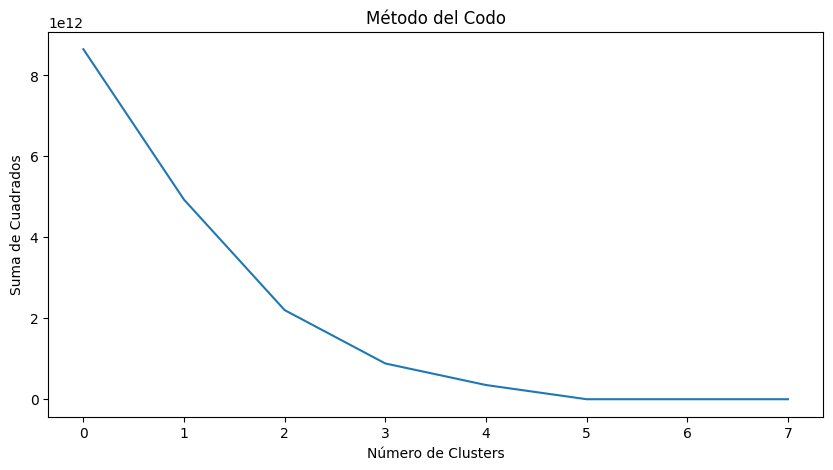

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(suma_cuadrados)
plt.xlabel('Número de Clusters')
plt.ylabel('Suma de Cuadrados')
plt.title('Método del Codo')
plt.show()

In [ ]:
def numero_ideal_clusters(inercia): #1
  x1, y1 = 2, inercia[0] #2
  x2, y2 = 20, inercia[-1] #3

  distancia = [] #4

  for i in range(len(inercia)): #5
    x0 = i+2 #6
    y0 = inercia[i] #7
    numerador = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1) #8
    denominador = ((y2-y1)**2 + (x2-x1)**2)**(1/2)
    distancia.append(numerador/denominador)#9

  return distancia.index(max(distancia)) + 2 #10

In [ ]:
print(f'El número ideal de clusters para nuestro df cfm_4 es: {numero_ideal_clusters(suma_cuadrados)}')

El número ideal de clusters para nuestro df cfm_4 es: 6


### Validación el número de clusters

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
import sklearn.metrics as metrics

In [ ]:

# Listas para guardar las métricas
n_clusters = []
davies_bouldin = []
calinski_harabasz = []
silhouette = []

for i in range(3, 11):
    clusterer = KMeans(n_clusters=i)
    preds = clusterer.fit_predict(cfm_4)
    labels = clusterer.labels_
    # Calcular las métricas
    sil_score = metrics.silhouette_score(cfm_4, labels, metric='euclidean')
    db_score = metrics.davies_bouldin_score(cfm_4, labels)
    ch_score = metrics.calinski_harabasz_score(cfm_4, labels)

    # Guardar las métricas en las listas
    n_clusters.append(i)
    davies_bouldin.append(db_score)
    calinski_harabasz.append(ch_score)
    silhouette.append(sil_score)

    # Crear el DataFrame para guardar los resultados
validacion_metricas_2= pd.DataFrame({'N_Clusters':n_clusters, 'silhouette': silhouette,'davies_bouldin': davies_bouldin, 'calinski_harabasz': calinski_harabasz})
#print(validacion_metricas_2)


In [ ]:
validacion_metricas_2

,N_Clusters,silhouette,davies_bouldin,calinski_harabasz
0,3,0.697612,0.493429,2.448591e+05
1,4,0.722281,0.400448,3.014343e+05
2,5,0.911246,0.273132,5.251395e+05
3,6,0.944966,0.297955,1.065073e+06
4,7,0.978090,0.159763,2.249257e+06
5,8,0.999865,0.000223,1.978033e+12
6,9,0.961413,0.078582,2.422942e+12
7,10,0.868060,0.178385,3.460115e+12


### Comentarios validación el número de clusters

Teniendo en cuenta las restricciones (El puntaje mínimo de Silhouette debe ser de 0.50; el de Davies-Bouldin máximo de 0.75; y el de CalinskiHarabasz, el número más alto posible.). La regla del codo no es tan claro pero  la regla matematica arroja un numero de clusters de 6, realizando la validacion del numero de clusters con las 3 metricas arriba mencionadas nos muestra que seria mejor 6 clusters,como el numero 6 arrojado por la regla matematica, tambien cumple con las 3 restricciones Es decir se deja el numero 6 clusters.
Se trabajo con 5 variables.


### Evaluación de las estructuras de clusters

In [ ]:
print(f'las columnas de X_std son :{X_std.shape[0]}')
print(f'las filas de X_std son :{X_std.shape[1]}')

las columnas de X_std son :60428
las filas de X_std son :5


In [ ]:
#lo que hay aqui no puede ser mejor que lo que hay Validación el número de clusters

random_data = np.random.rand(X_std.shape[0],X_std.shape[1])#columnas y filas

# Listas para guardar las métricas
n_clusters = []
davies_bouldin = []
calinski_harabasz = []
silhouette = []

for i in range(3, 11):
    clusterer = KMeans(n_clusters=i, n_init=10, max_iter=300)
    preds = clusterer.fit_predict(random_data)
    labels = clusterer.labels_
    # Calcular las métricas
    sil_score = metrics.silhouette_score(random_data, labels, metric='euclidean')
    db_score = metrics.davies_bouldin_score(random_data, labels)
    ch_score = metrics.calinski_harabasz_score(random_data, labels)

    # Guardar las métricas en las listas
    n_clusters.append(i)
    davies_bouldin.append(db_score)
    calinski_harabasz.append(ch_score)
    silhouette.append(sil_score)

    # Crear el DataFrame para guardar los resultados
random_table= pd.DataFrame({'N_Clusters':n_clusters, 'silhouette': silhouette,'davies_bouldin': davies_bouldin, 'calinski_harabasz': calinski_harabasz})
#print(random_table)



In [ ]:
random_table

,N_Clusters,silhouette,davies_bouldin,calinski_harabasz
0,3,0.136083,1.989003,9698.398344
1,4,0.142471,1.898826,9273.685843
2,5,0.145657,1.632749,8859.424453
3,6,0.149255,1.529909,8634.737451
4,7,0.153012,1.467835,8330.815996
5,8,0.159846,1.427556,8196.562129
6,9,0.163161,1.366801,8108.680941
7,10,0.169371,1.275649,8117.598490


### Evaluación de las estabilidad de clusters

In [ ]:

set1, set2, set3, set4 = np.array_split(X_std, 4)
sets=[set1, set2, set3, set4]
scores=[]
n=1
for set_ in sets:
    score={}
    kmeans = KMeans(n_clusters=6, n_init=10, max_iter=300)
    y_pred = kmeans.fit_predict(set_)
    labels = kmeans.labels_
    score['set'] = f'set_{n}'
    n+=1
    score['silhouette']= metrics.silhouette_score(set_, labels, metric='euclidean')
    score['davies_bouldin']= metrics.davies_bouldin_score(set_, labels)
    score['calinski_harabasz']= metrics.calinski_harabasz_score(set_, labels)
    scores.append(score)

estabilidad_table=pd.DataFrame(scores)
#print(estabilidad_table)


In [ ]:
estabilidad_table

,set,silhouette,davies_bouldin,calinski_harabasz
0,set_1,0.428178,0.969793,6949.378597
1,set_2,0.374479,1.006859,5807.341844
2,set_3,0.391209,1.069064,6241.748023
3,set_4,0.320709,1.133169,5198.538348


### Instanciando la mejor configuración de clusters

In [ ]:
datos_raw = cfm_2.copy()
datos_raw.head()

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,total_de_hijos,escolaridad,miembro,ocupacion,vivienda_propia,promedio_autos(aprox),ingreso_anual,numero_hijos,promedio_autos(aprox).1,marca,precio_recomendado,peso_bruto,peso_neto,empaque_reciclable,bajo_en_grasa,unidades_por_caja,comercio,ciudad,estado,pies_cuadrados_tienda,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo,ingreso_anual(en millones)
0,Alimentos para el desayuno,Alimentos congelados,Comida,7.36,2.7232,4.0,Bolsas llenas,Estados Unidos,Casado,Femenino,1.0,Primaria,Normal,Técnico,Sí,1.0,20000,1.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",126.62,0.02
1,Alimentos para el desayuno,Alimentos congelados,Comida,5.52,2.5944,3.0,Lotería de la caja registradora,Estados Unidos,Casado,Masculino,0.0,Superior,Plata,Profesional,Sí,4.0,60000,0.0,4.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",59.86,0.06
2,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.3616,2.0,Ahorro para apostadores grandes,Estados Unidos,Soltero,Femenino,4.0,Primaria,Normal,Obrero,No,1.0,20000,0.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",84.16,0.02
3,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.1776,2.0,Lotería de la caja registradora,Estados Unidos,Casado,Femenino,2.0,Secundaria,Bronce,Obrero,Sí,2.0,40000,2.0,2.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Cupón en la tienda,95.78,0.04
4,Alimentos para el desayuno,Alimentos congelados,Comida,4.08,1.4280,3.0,Venta Doble,Estados Unidos,Casado,Masculino,0.0,Primaria,Bronce,Técnico,No,2.0,40000,0.0,2.0,Golden,1.36,7.12,5.11,0.0,1.0,29.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79,0.04


In [ ]:
datos_raw.shape

(60428, 41)

In [ ]:
kmeans = KMeans(n_clusters= 6) #1
datos_raw['cluster']= kmeans.fit_predict(cfm_4)#X_std
datos_raw.head()#3

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,total_de_hijos,escolaridad,miembro,ocupacion,vivienda_propia,promedio_autos(aprox),ingreso_anual,numero_hijos,promedio_autos(aprox).1,marca,precio_recomendado,peso_bruto,peso_neto,empaque_reciclable,bajo_en_grasa,unidades_por_caja,comercio,ciudad,estado,pies_cuadrados_tienda,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo,ingreso_anual(en millones),cluster
0,Alimentos para el desayuno,Alimentos congelados,Comida,7.36,2.7232,4.0,Bolsas llenas,Estados Unidos,Casado,Femenino,1.0,Primaria,Normal,Técnico,Sí,1.0,20000,1.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",126.62,0.02,0
1,Alimentos para el desayuno,Alimentos congelados,Comida,5.52,2.5944,3.0,Lotería de la caja registradora,Estados Unidos,Casado,Masculino,0.0,Superior,Plata,Profesional,Sí,4.0,60000,0.0,4.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",59.86,0.06,4
2,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.3616,2.0,Ahorro para apostadores grandes,Estados Unidos,Soltero,Femenino,4.0,Primaria,Normal,Obrero,No,1.0,20000,0.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",84.16,0.02,0
3,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.1776,2.0,Lotería de la caja registradora,Estados Unidos,Casado,Femenino,2.0,Secundaria,Bronce,Obrero,Sí,2.0,40000,2.0,2.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Cupón en la tienda,95.78,0.04,2
4,Alimentos para el desayuno,Alimentos congelados,Comida,4.08,1.4280,3.0,Venta Doble,Estados Unidos,Casado,Masculino,0.0,Primaria,Bronce,Técnico,No,2.0,40000,0.0,2.0,Golden,1.36,7.12,5.11,0.0,1.0,29.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79,0.04,2


In [ ]:
datos_raw['cluster'].value_counts()

cluster
2    19514
0    12959
4    10493
5     7544
1     5327
3     4591
Name: count, dtype: int64

In [ ]:
datos_raw['cluster'].value_counts(normalize=True) * 100

cluster
2    32.292977
0    21.445356
4    17.364467
5    12.484279
1     8.815450
3     7.597471
Name: proportion, dtype: float64

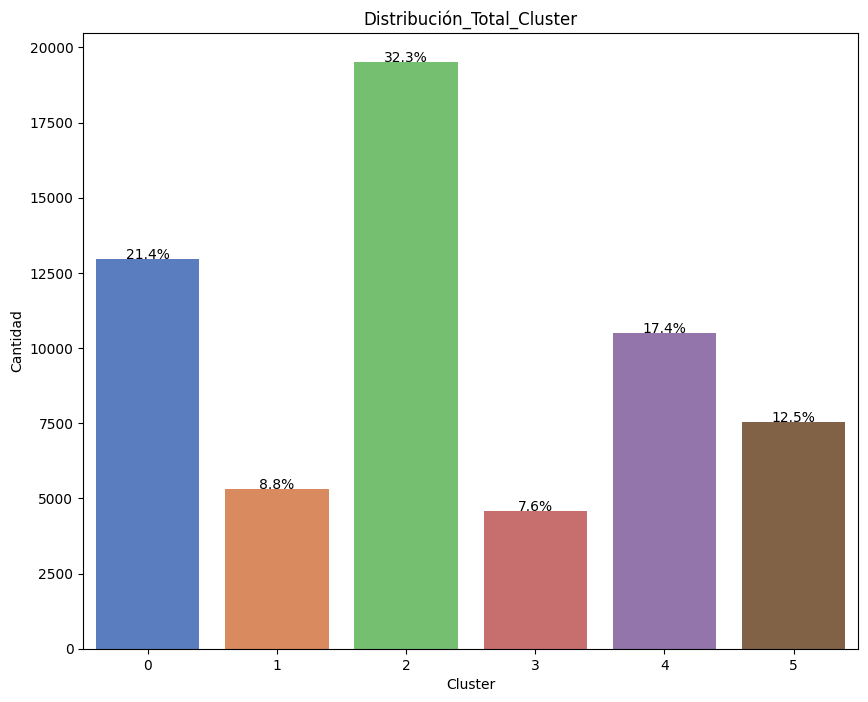

In [ ]:
fig=plt.figure(figsize=(10,8))
ax=sns.countplot(data=datos_raw, x='cluster',palette='muted' );
ax.set_title('Distribución_Total_Cluster')
ax.set_xlabel('Cluster')
ax.set_ylabel('Cantidad')
total = len(datos_raw)  # Total de datos
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + 2,
        f'{height/total:.1%}',
        ha='center'
    )

Distribución por clúster

Se observa que en el clúster número 2 de color verde concentra una mayor frecuencia con el 32.3% y la menor frecuencia está en el clúster número 3 con 7.6%.

Text(0, 0.5, 'Cantidad')

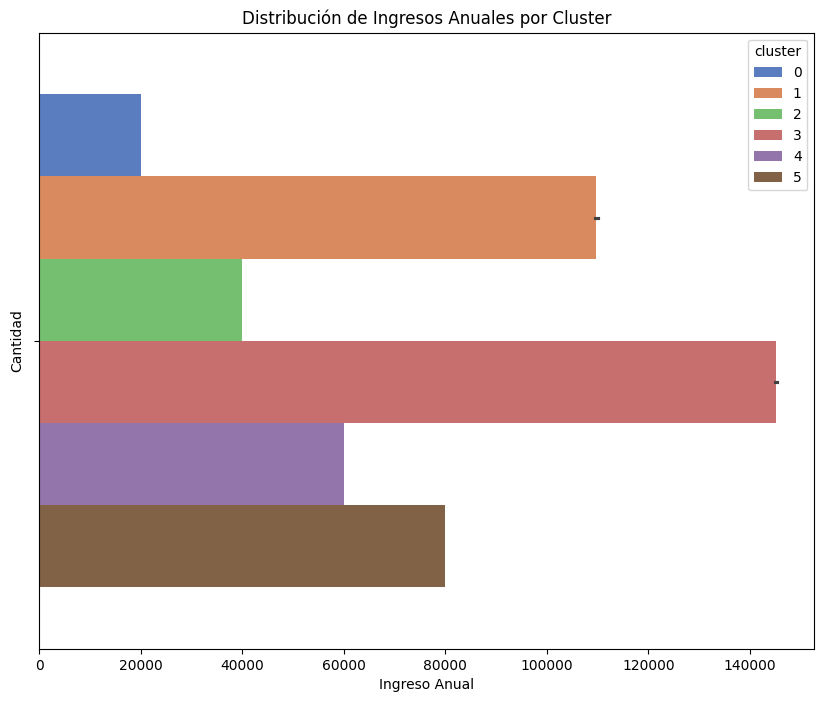

In [ ]:
fig=plt.figure(figsize=(10,8))
ax=sns.barplot(data=datos_raw, x='ingreso_anual', hue='cluster',palette='muted' );
ax.set_title('Distribución de Ingresos Anuales por Cluster')
ax.set_xlabel('Ingreso Anual')
ax.set_ylabel('Cantidad')

En el cluster 3 concentra el mayor nivel de ingreso_anual

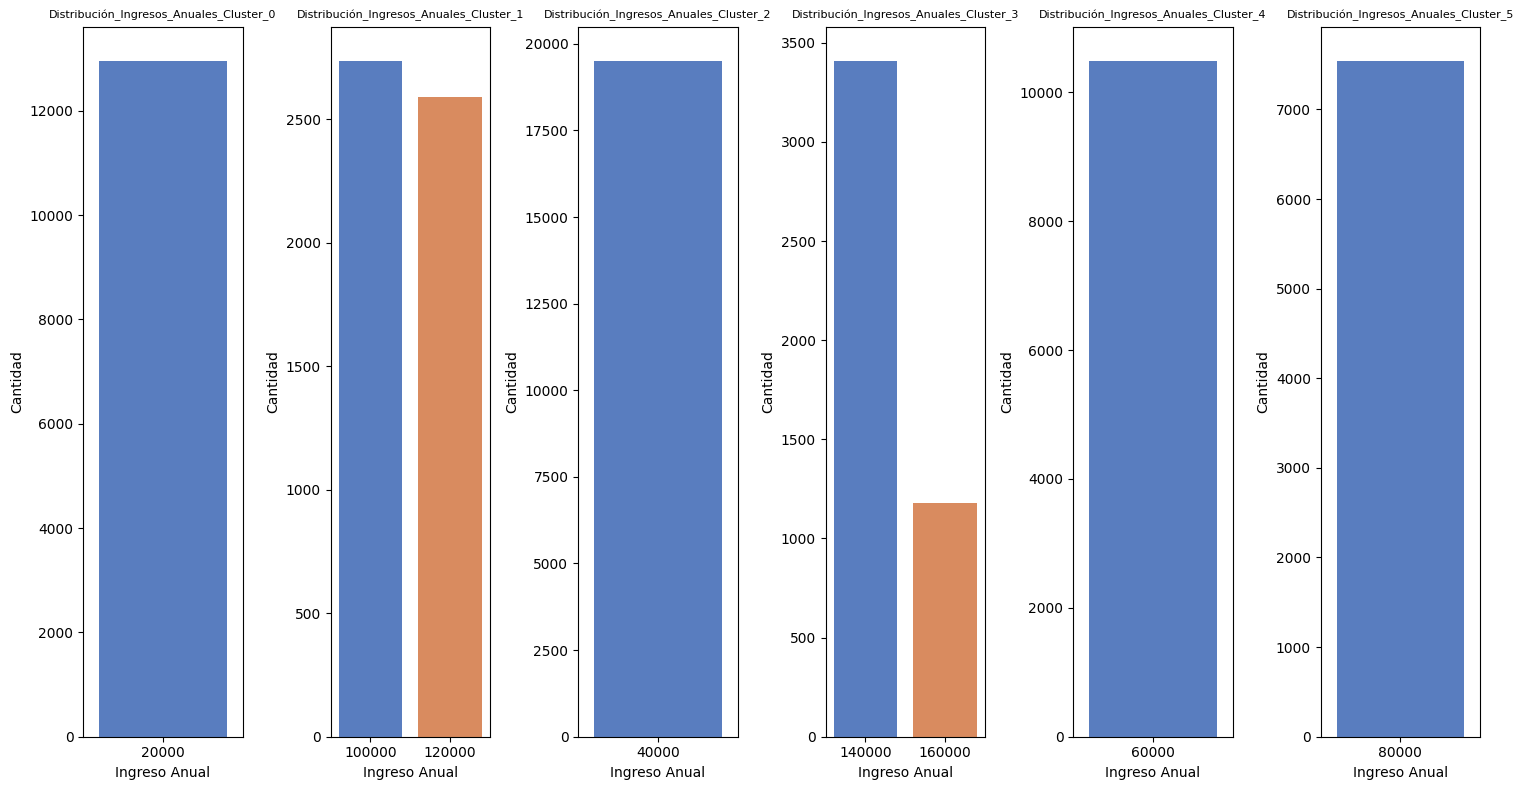

In [ ]:
from tables import group
fig, (g5, g6, g7, g8 ,g9, g10) = plt.subplots(1, 6,  figsize=(15, 8))


# Crear Graficos

g5=sns.countplot(data=datos_raw[datos_raw['cluster']==0], x='ingreso_anual',palette='muted',ax=g5);
g5.set_title('Distribución_Ingresos_Anuales_Cluster_0',fontsize=8)
g5.set_xlabel('Ingreso Anual')
g5.set_ylabel('Cantidad')

g6=sns.countplot(data=datos_raw[datos_raw['cluster']==1], x='ingreso_anual',palette='muted',ax=g6);
g6.set_title('Distribución_Ingresos_Anuales_Cluster_1',fontsize=8)
g6.set_xlabel('Ingreso Anual')
g6.set_ylabel('Cantidad')

g7=sns.countplot(data=datos_raw[datos_raw['cluster']==2], x='ingreso_anual',palette='muted', ax=g7);
g7.set_title('Distribución_Ingresos_Anuales_Cluster_2',fontsize=8)
g7.set_xlabel('Ingreso Anual')
g7.set_ylabel('Cantidad')

g8=sns.countplot(data=datos_raw[datos_raw['cluster']==3], x='ingreso_anual',palette='muted', ax=g8);
g8.set_title('Distribución_Ingresos_Anuales_Cluster_3',fontsize=8)
g8.set_xlabel('Ingreso Anual')
g8.set_ylabel('Cantidad')

g9=sns.countplot(data=datos_raw[datos_raw['cluster']==4], x='ingreso_anual',palette='muted', ax=g9);
g9.set_title('Distribución_Ingresos_Anuales_Cluster_4',fontsize=8)
g9.set_xlabel('Ingreso Anual')
g9.set_ylabel('Cantidad')

g10=sns.countplot(data=datos_raw[datos_raw['cluster']==5], x='ingreso_anual',palette='muted',ax=g10);
g10.set_title('Distribución_Ingresos_Anuales_Cluster_5',fontsize=8)
g10.set_xlabel('Ingreso Anual')
g10.set_ylabel('Cantidad')

plt.subplots_adjust(top=0.85)
plt.tight_layout()
plt.show()

Distribución ingresos anuales por clúster

Los ingresos anuales por clúster se observan que los menores ingresos quedaron en el clúster 0 quedando en el puesto 6 y los mayores ingresos quedaron en el clúster 3 puesto 1, esté concentra los ingresos de 140.000 y 160.000.  

El clúster 1 concentra los ingresos de 100.000 y 120.000, siendo el segundo en la lista, el tercero es el clúster 5, el cuarto puesto es para el clúster 4 y el quinto puesto el clúster 2.

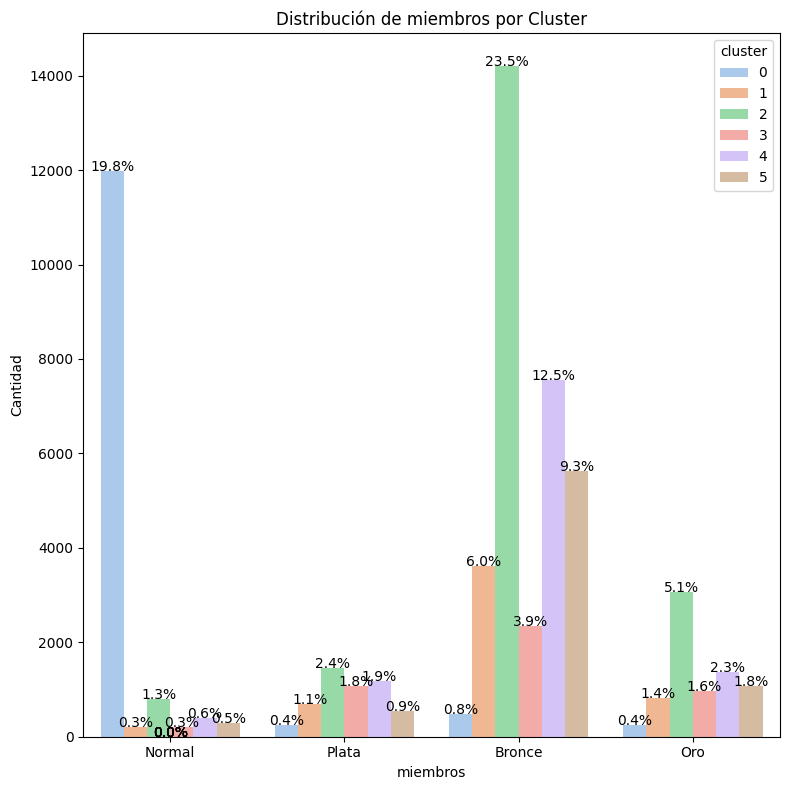

In [ ]:
fig=plt.figure(figsize=(8,8))
ax=sns.countplot(data=datos_raw, x='miembro', hue='cluster',palette='pastel' );
ax.set_title('Distribución de miembros por Cluster')
ax.set_xlabel('miembros')
ax.set_ylabel('Cantidad')

total = len(datos_raw)  # Total de datos
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + 2,
        f'{height/total:.1%}',
        ha='center'
    )

plt.tight_layout()
plt.show()


Distribución por miembro Clúster

Se observa que en clúster 0 de color azul claro, esta el miembro normal con un 19.8%, mientras que en el clúster 2 de color verde claro con 23,5%, esta le miembro bronce.

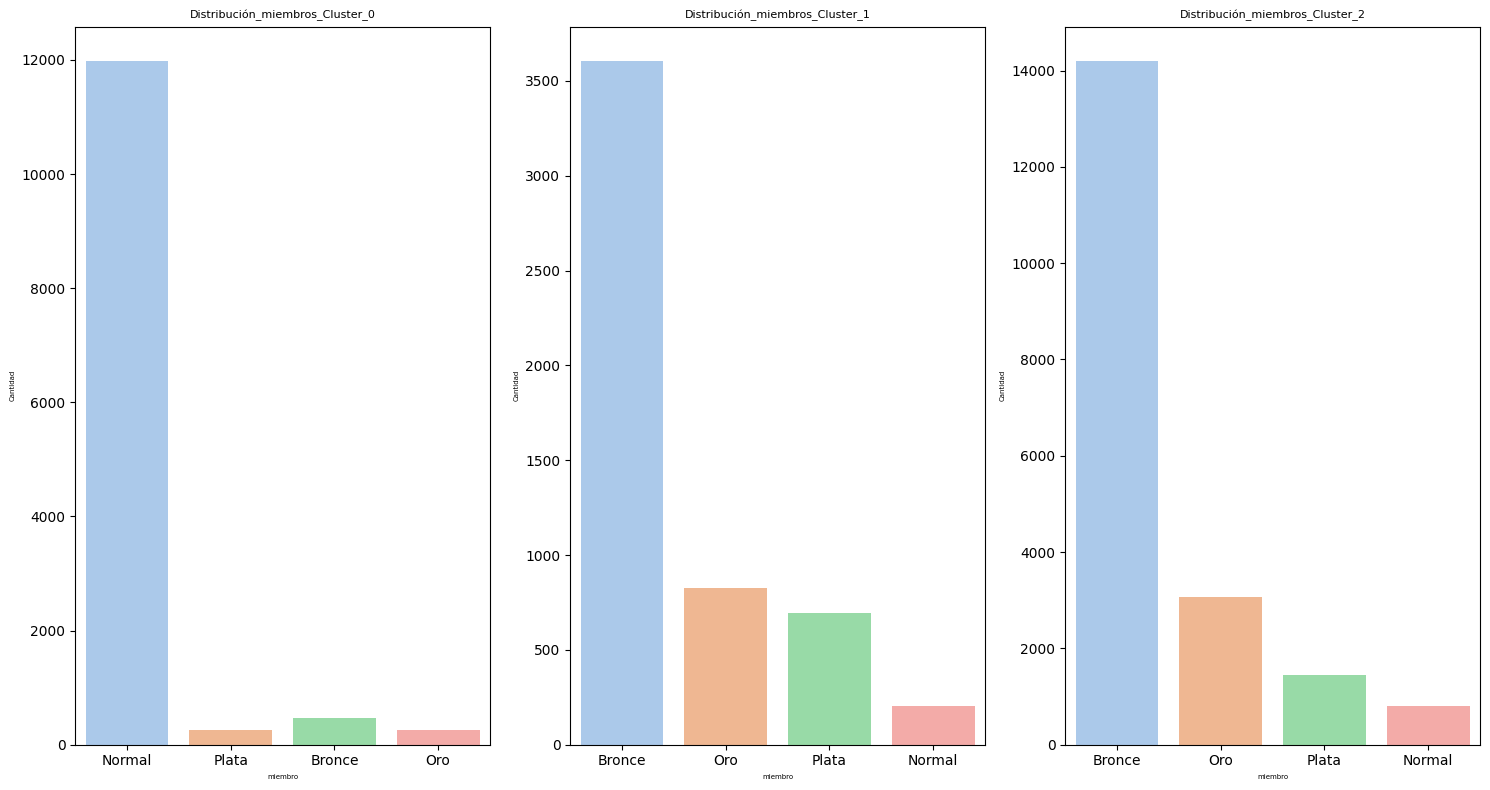

In [ ]:
fig, (g5, g6, g7) = plt.subplots(1, 3,  figsize=(15, 8))


# Crear Graficos

g5=sns.countplot(data=datos_raw[datos_raw['cluster']==0], x='miembro',palette='pastel',ax=g5);
g5.set_title('Distribución_miembros_Cluster_0',fontsize=8)
g5.set_xlabel('miembro',fontsize=5)
g5.set_ylabel('Cantidad',fontsize=5)

g6=sns.countplot(data=datos_raw[datos_raw['cluster']==1], x='miembro',palette='pastel',ax=g6);
g6.set_title('Distribución_miembros_Cluster_1',fontsize=8)
g6.set_xlabel('miembro',fontsize=5)
g6.set_ylabel('Cantidad', fontsize=5)

g7=sns.countplot(data=datos_raw[datos_raw['cluster']==2], x='miembro',palette='pastel', ax=g7);
g7.set_title('Distribución_miembros_Cluster_2',fontsize=8)
g7.set_xlabel('miembro',fontsize=5)
g7.set_ylabel('Cantidad',fontsize=5)



plt.subplots_adjust(top=0.85)
plt.tight_layout()
plt.show()

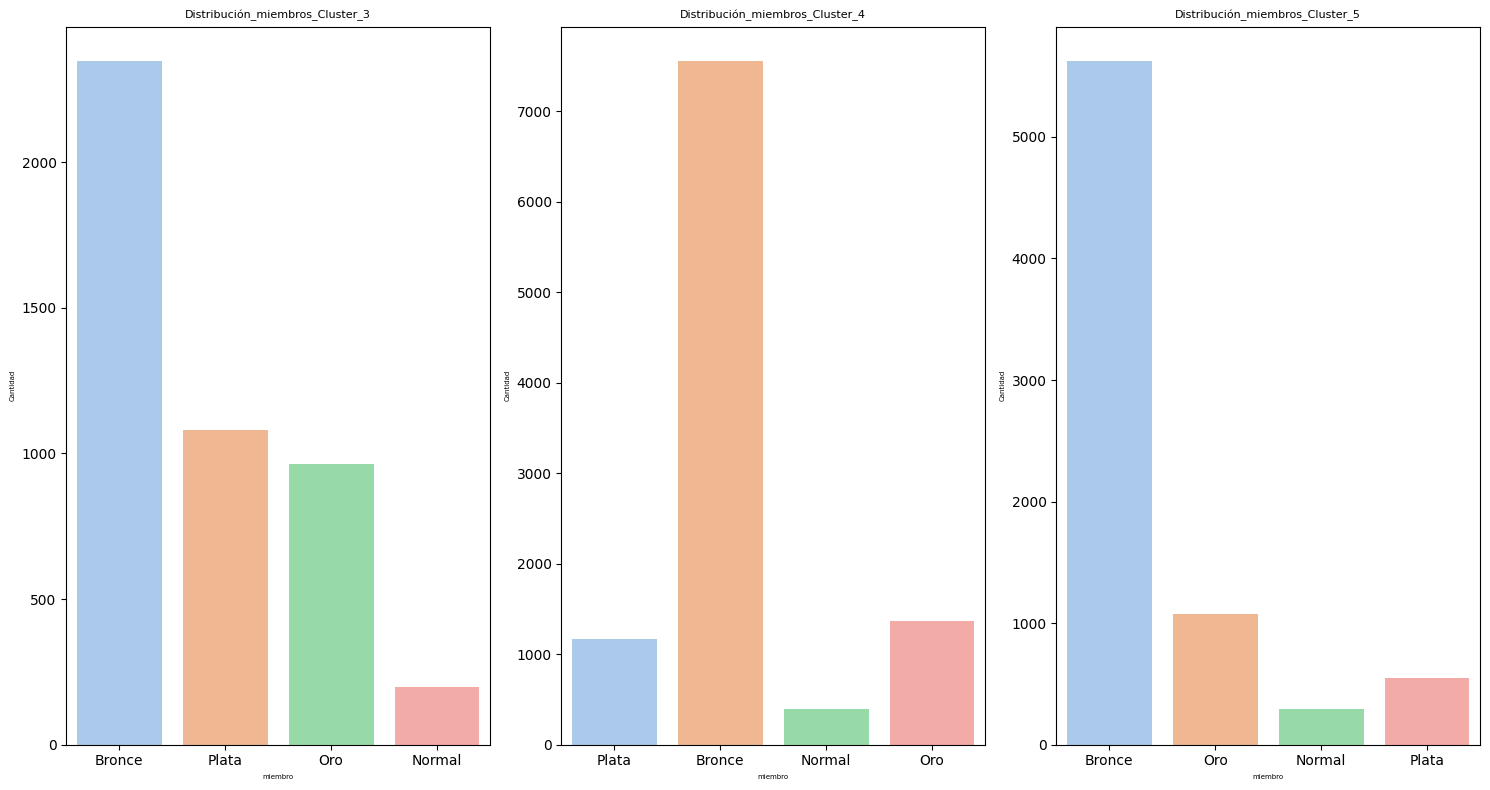

In [ ]:
fig,  (g8 ,g9, g10) = plt.subplots(1, 3,  figsize=(15, 8))


# Crear Graficos

g8=sns.countplot(data=datos_raw[datos_raw['cluster']==3], x='miembro',palette='pastel',ax=g8);
g8.set_title('Distribución_miembros_Cluster_3',fontsize=8)
g8.set_xlabel('miembro',fontsize=5)
g8.set_ylabel('Cantidad',fontsize=5)

g9=sns.countplot(data=datos_raw[datos_raw['cluster']==4], x='miembro',palette='pastel',ax=g9);
g9.set_title('Distribución_miembros_Cluster_4',fontsize=8)
g9.set_xlabel('miembro',fontsize=5)
g9.set_ylabel('Cantidad', fontsize=5)

g10=sns.countplot(data=datos_raw[datos_raw['cluster']==5], x='miembro',palette='pastel', ax=g10);
g10.set_title('Distribución_miembros_Cluster_5',fontsize=8)
g10.set_xlabel('miembro',fontsize=5)
g10.set_ylabel('Cantidad',fontsize=5)



plt.subplots_adjust(top=0.85)
plt.tight_layout()
plt.show()

Distribución por miembro Clúster

Se observa que en clúster 0 de color azul claro, esta el miembro normal con un 19.8%, mientras que en el clúster 2 de color verde claro con 23,5%, esta le miembro bronce.

Se observa que en el clúster 0 esta ubicado de mayor preferencia los miembros que no tienen una categoría como miembro que son los clientes normales, para los demás se observa mayor frecuencia de bronce (el cual es nuestro miembro de mayor frecuencia), en el clúster 3 además de mayor frecuencia el bronce, se observa también de mayor frecuencia plata y oro.

In [ ]:
def plot_relacion(x,y,datos):
  plt.figure(figsize=(10,6))
  #sns.set(palette='plasma', color_codes=True, style='whitegrid' )
  sns.scatterplot(x=x, y=y, hue='cluster', data=datos_raw, size='cluster',
                  sizes=(50,150), size_order=['0','1','2','3','4','5'])
  plt.show()

In [ ]:
datos_raw.rename(columns={'ventas_tienda(en millones)': 'ventas_tienda_millones', 'ingreso_anual(en millones)': 'ingreso_anual_millones'}, inplace=True)


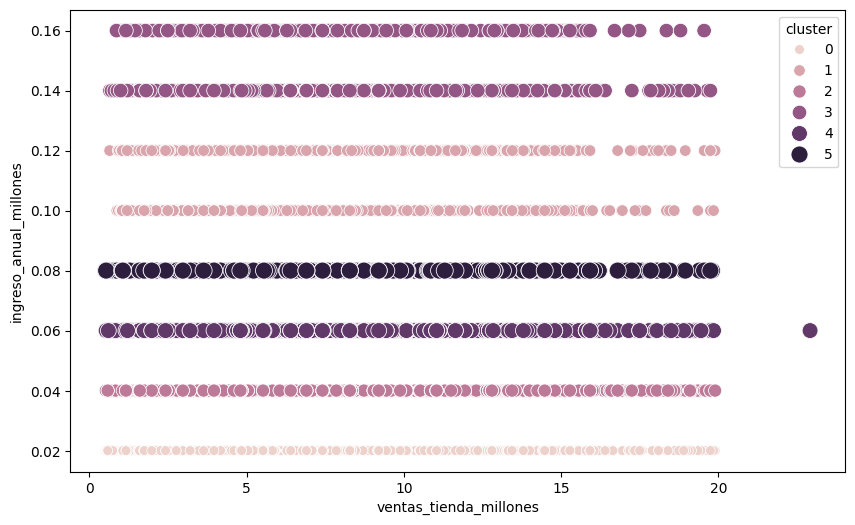

In [ ]:
plot_relacion('ventas_tienda_millones','ingreso_anual_millones',datos_raw)

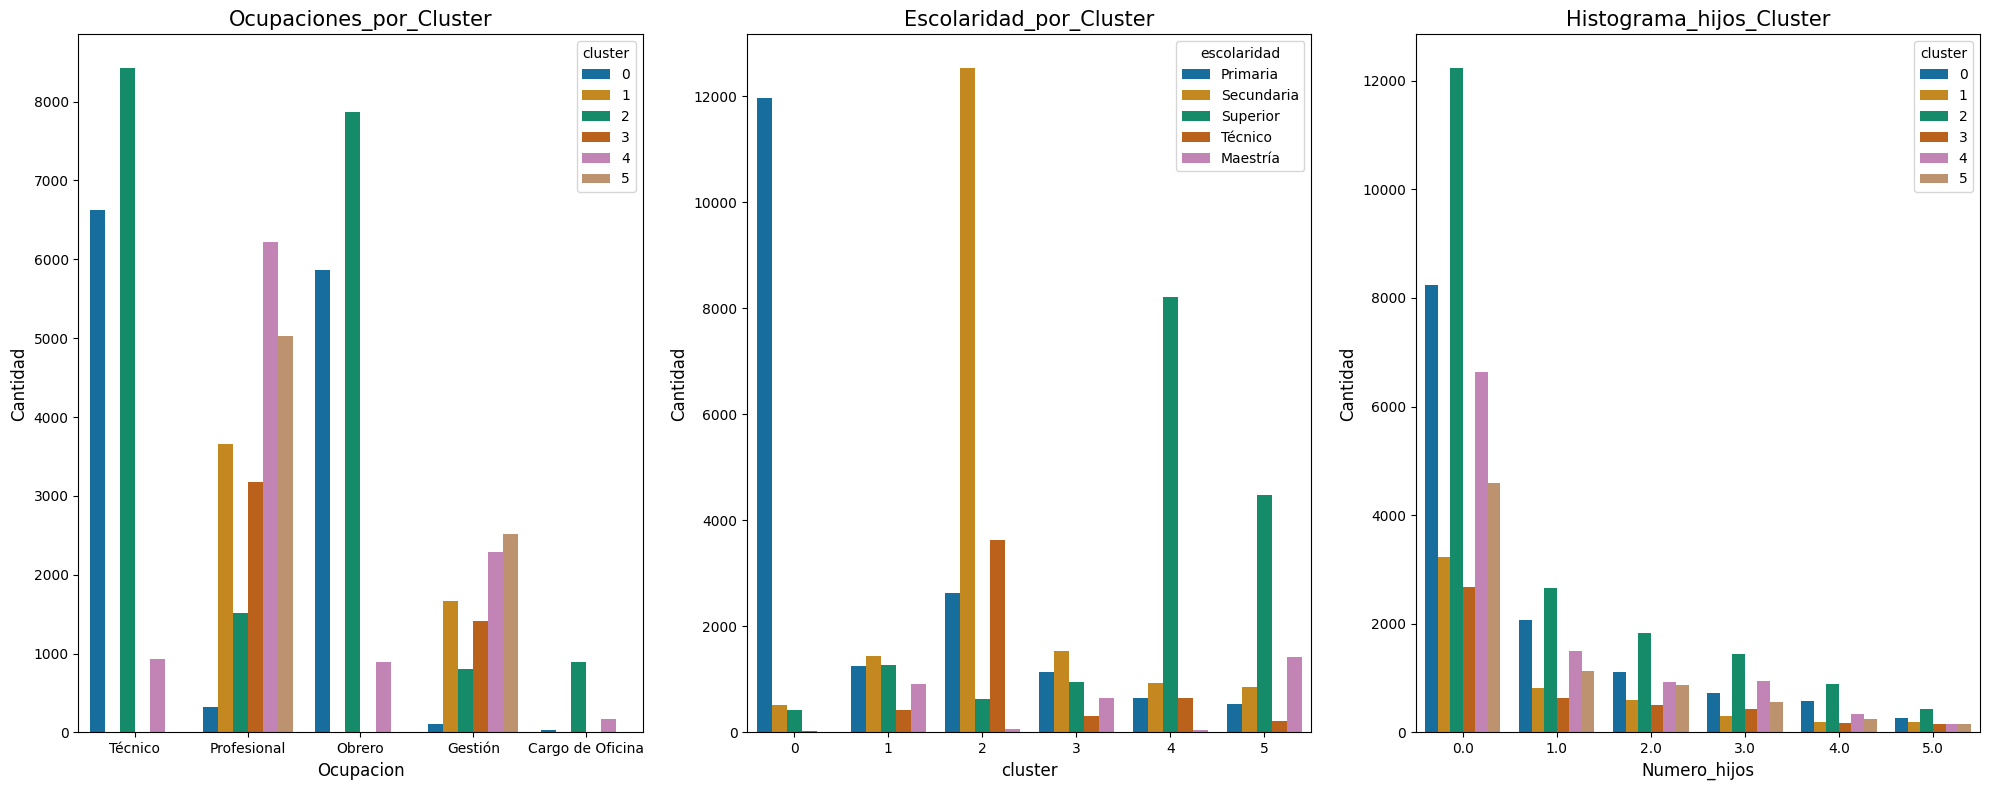

In [ ]:

fig, (g1, g2, g3) = plt.subplots(1, 3,  figsize=(20, 8))


# Crear Graficos

g1=sns.countplot(data=datos_raw, x='ocupacion', hue='cluster', ax=g1,palette='colorblind')
g1.set_title('Ocupaciones_por_Cluster',fontsize=15)
g1.set_xlabel('Ocupacion',fontsize=12)
g1.set_ylabel('Cantidad',fontsize=12)

g2=sns.countplot(data=datos_raw, x='cluster',hue='escolaridad',palette='colorblind', ax=g2)
#g2=sns.distplot(data=datos_raw, x='escolaridad',hue='cluster', ax=g2)
g2.set_title('Escolaridad_por_Cluster',fontsize=15)
g2.set_xlabel('cluster',fontsize=12)
g2.set_ylabel('Cantidad',fontsize=12)


g3=sns.countplot(data=datos_raw, x='numero_hijos', hue='cluster',palette='colorblind', ax=g3)
g3.set_title('Histograma_hijos_Cluster',fontsize=15)
g3.set_xlabel('Numero_hijos',fontsize=12)
g3.set_ylabel('Cantidad',fontsize=12)

plt.subplots_adjust(top=0.85)
plt.tight_layout()
plt.show()




Clusterización por Ocupación, escolaridad y número de hijos

Se observa que en el clúster 0 esta en ocupación de prevalencia técnico, para el clúster 2 repunta técnico y obrero, en los clústeres 1,3,4 y 5 profesional.

Se observa que en el clúster 0 esta en escolaridad de prevalencia primaria, para los clústeres 1, 2 y 3 es secundaria, para los clústeres 4 y 5  son escolaridad superior.

Para el número de niños prevalece el mayor en todos los clúster que es 0 número de hijos.

<Axes: title={'center': 'Ingreso_anual_tipo'}, xlabel='cluster', ylabel='ingreso_anual'>

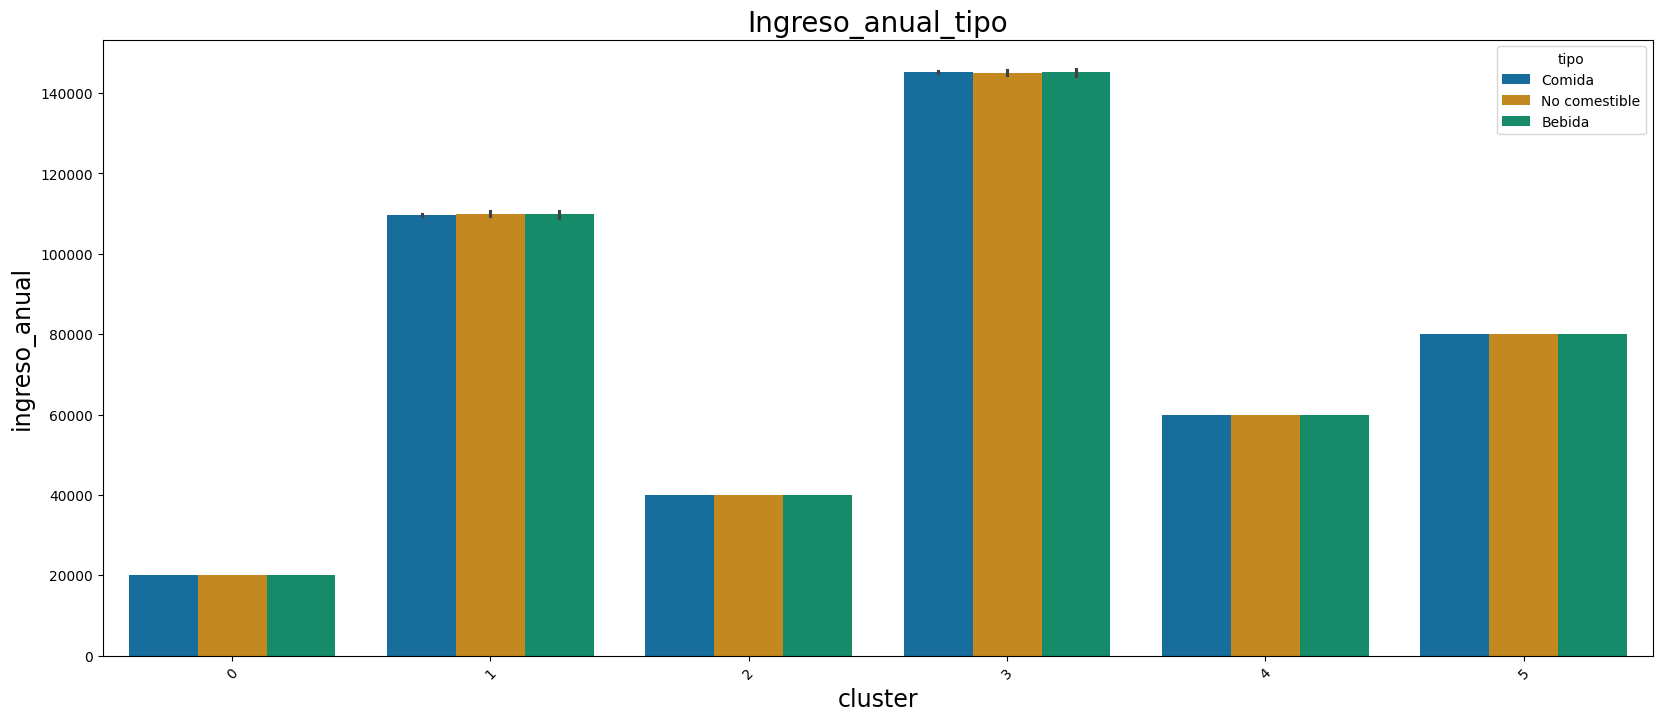

In [ ]:
plt.figure(figsize=(20, 8))

g11 = sns.barplot(x='cluster', y='ingreso_anual',
                 data=datos_raw,
                 hue='tipo',
                 palette='colorblind')

g11.set_title("Ingreso_anual_tipo", fontsize=20)
g11.set_xlabel("cluster", fontsize=17)
g11.set_ylabel("ingreso_anual", fontsize=17)

g11.set_xticklabels(g11.get_xticklabels(), rotation=45)

g11

<Axes: title={'center': 'ingreso_anual_millones_por_tipo_cluster'}, xlabel='tipo', ylabel='ingreso_anual_millones'>

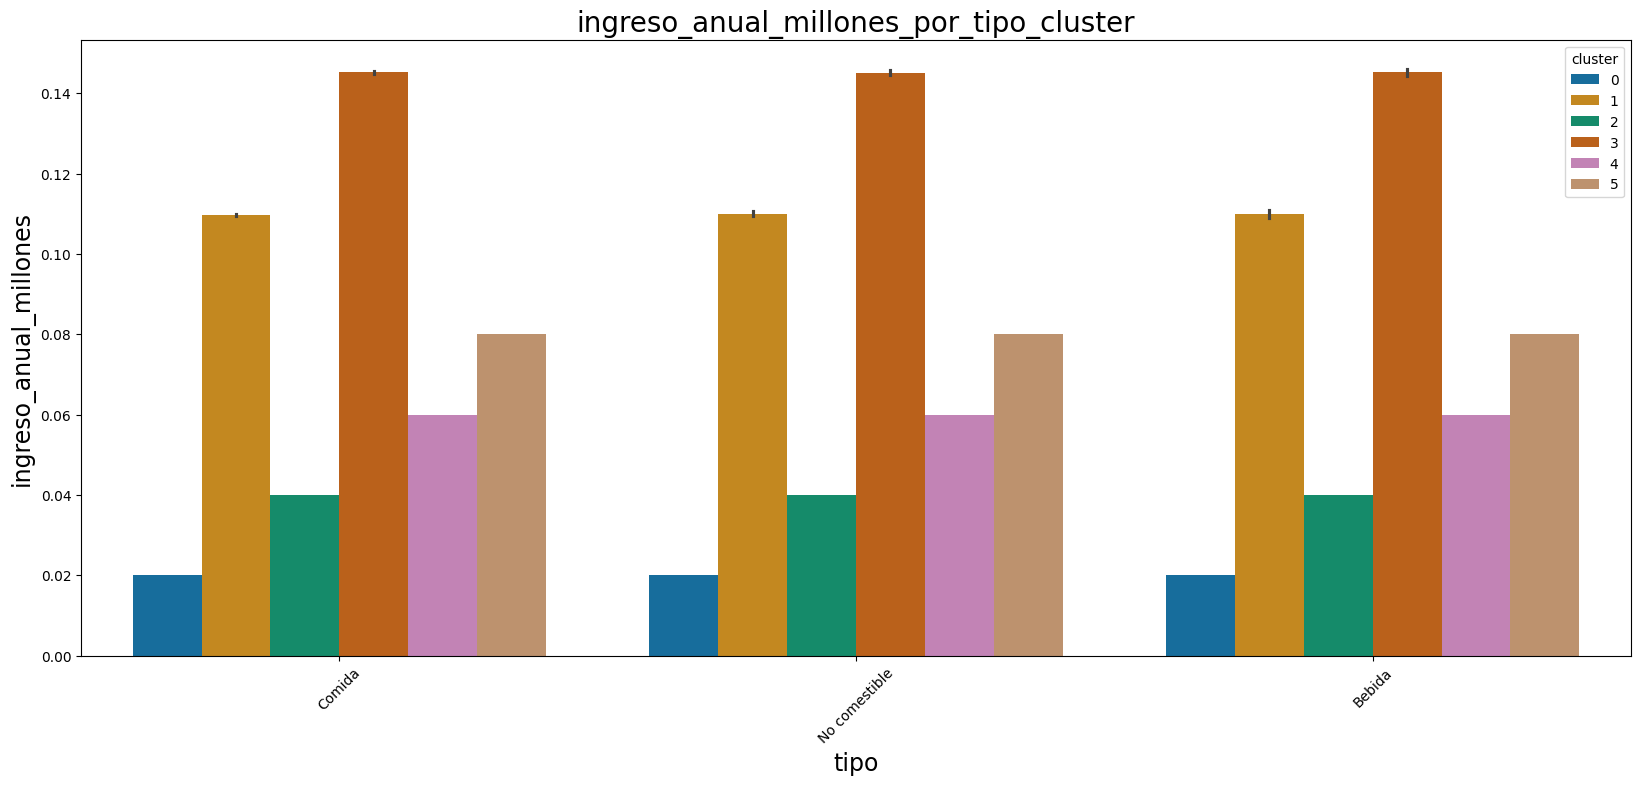

In [ ]:
plt.figure(figsize=(20, 8))

g13 = sns.barplot(x='tipo', y='ingreso_anual_millones',
                 data=datos_raw,
                 hue='cluster',
                 palette='colorblind')

g13.set_title("ingreso_anual_millones_por_tipo_cluster", fontsize=20)
g13.set_xlabel("tipo", fontsize=17)
g13.set_ylabel("ingreso_anual_millones", fontsize=17)

g13.set_xticklabels(g13.get_xticklabels(), rotation=45)

g13

Análisis por tipo de alimentos, ingresos, clúster

En el clúster 3, de color rojizo, se encuentran agrupados los clientes que perciben más ingresos y están relacionados con el tipo de productos de comida.

En el clúster 3, de color rojizo, se encuentran agrupados los clientes que perciben más ingresos y están relacionados con el tipo de productos no comestibles.

En el clúster 3, de color rojizo, se encuentran agrupados los clientes que perciben ingresos y estan relacionados con el tipo de productos de bebida.

<Axes: title={'center': 'ventas_tienda_millones_por_tipo_Cluster'}, xlabel='cluster', ylabel='ventas_tienda_millones'>

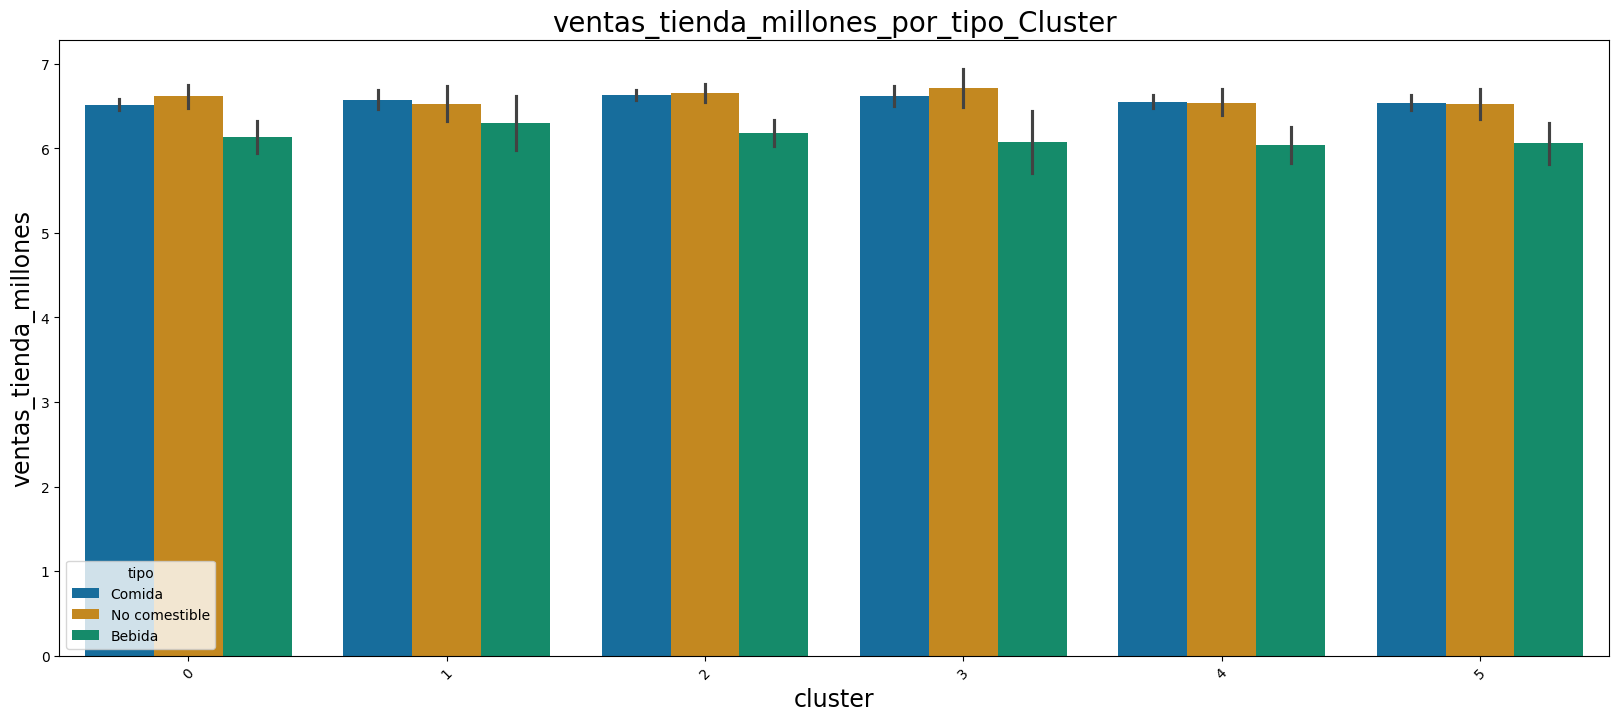

In [ ]:
plt.figure(figsize=(20, 8))

g12 = sns.barplot(x='cluster', y='ventas_tienda_millones',
                 data=datos_raw,
                 hue='tipo',
                 palette='colorblind')

g12.set_title("ventas_tienda_millones_por_tipo_Cluster", fontsize=20)
g12.set_xlabel("cluster", fontsize=17)
g12.set_ylabel("ventas_tienda_millones", fontsize=17)

g12.set_xticklabels(g12.get_xticklabels(), rotation=45)

g12

<Axes: title={'center': 'ventas_tienda_millones_por_tipo_Cluster'}, xlabel='tipo', ylabel='ventas_tienda_millones'>

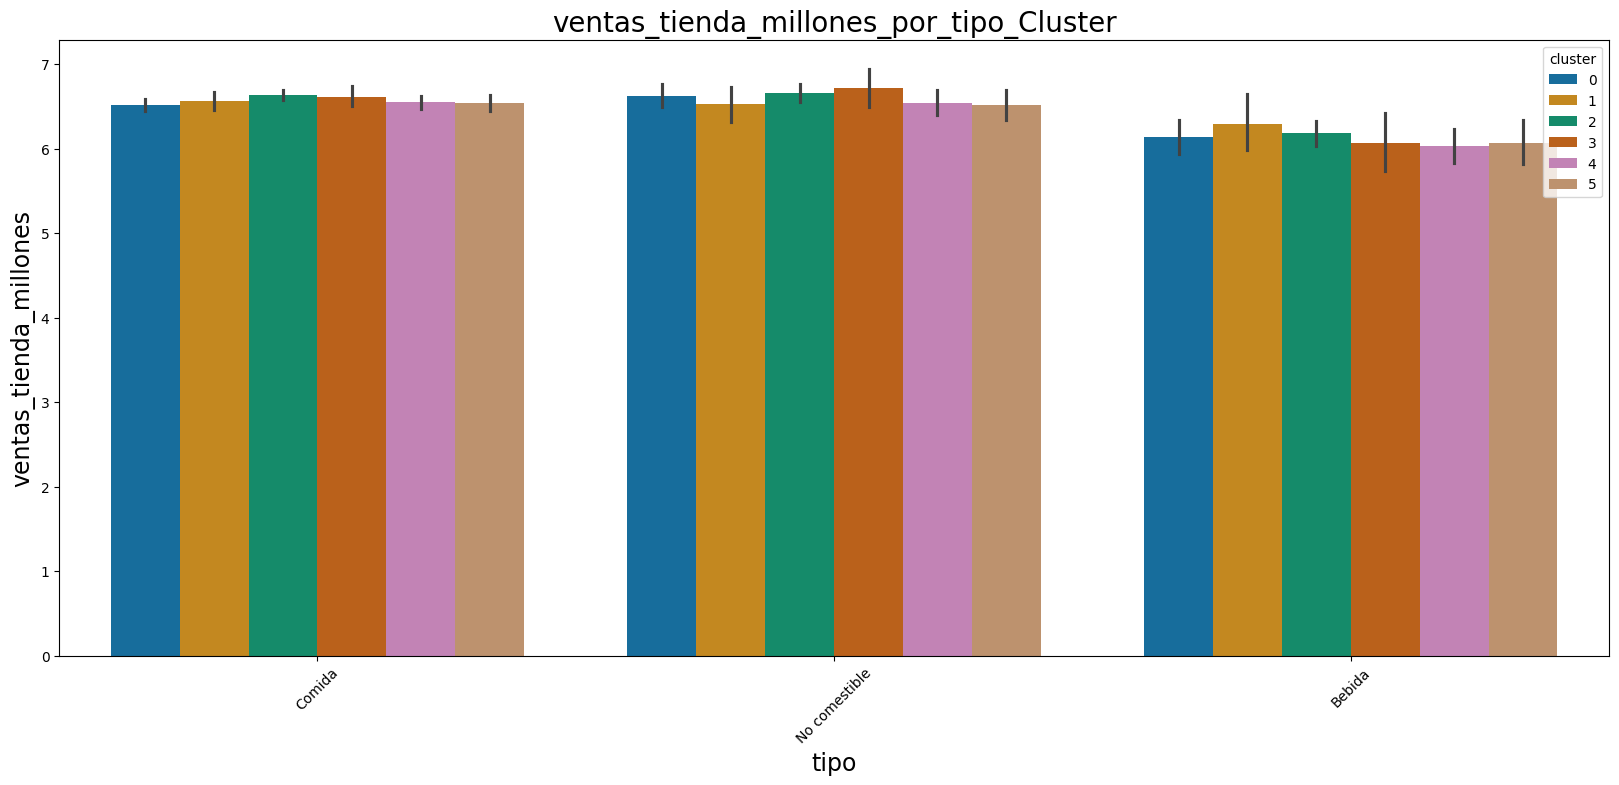

In [ ]:
plt.figure(figsize=(20, 8))

g12 = sns.barplot(x='tipo', y='ventas_tienda_millones',
                 data=datos_raw,
                 hue='cluster',
                 palette='colorblind')

g12.set_title("ventas_tienda_millones_por_tipo_Cluster", fontsize=20)
g12.set_xlabel("tipo", fontsize=17)
g12.set_ylabel("ventas_tienda_millones", fontsize=17)

g12.set_xticklabels(g12.get_xticklabels(), rotation=45)

g12

Análisis por tipo- ventas-clúster

En el clúster 2, de color verde, se encuentran agrupados los clientes que gastan más dinero en productos de comida.

En el clúster 3, de color rojo, se encuentran agrupados los clientes que gastan más dinero en productos no comestibles.

En el clúster 1, de color café oscuro, se encuentran agrupados los clientes que gastan más dinero en productos de bebida.






<Axes: title={'center': 'pais_cluster_ingreso'}, xlabel='cluster', ylabel='ingreso_anual'>

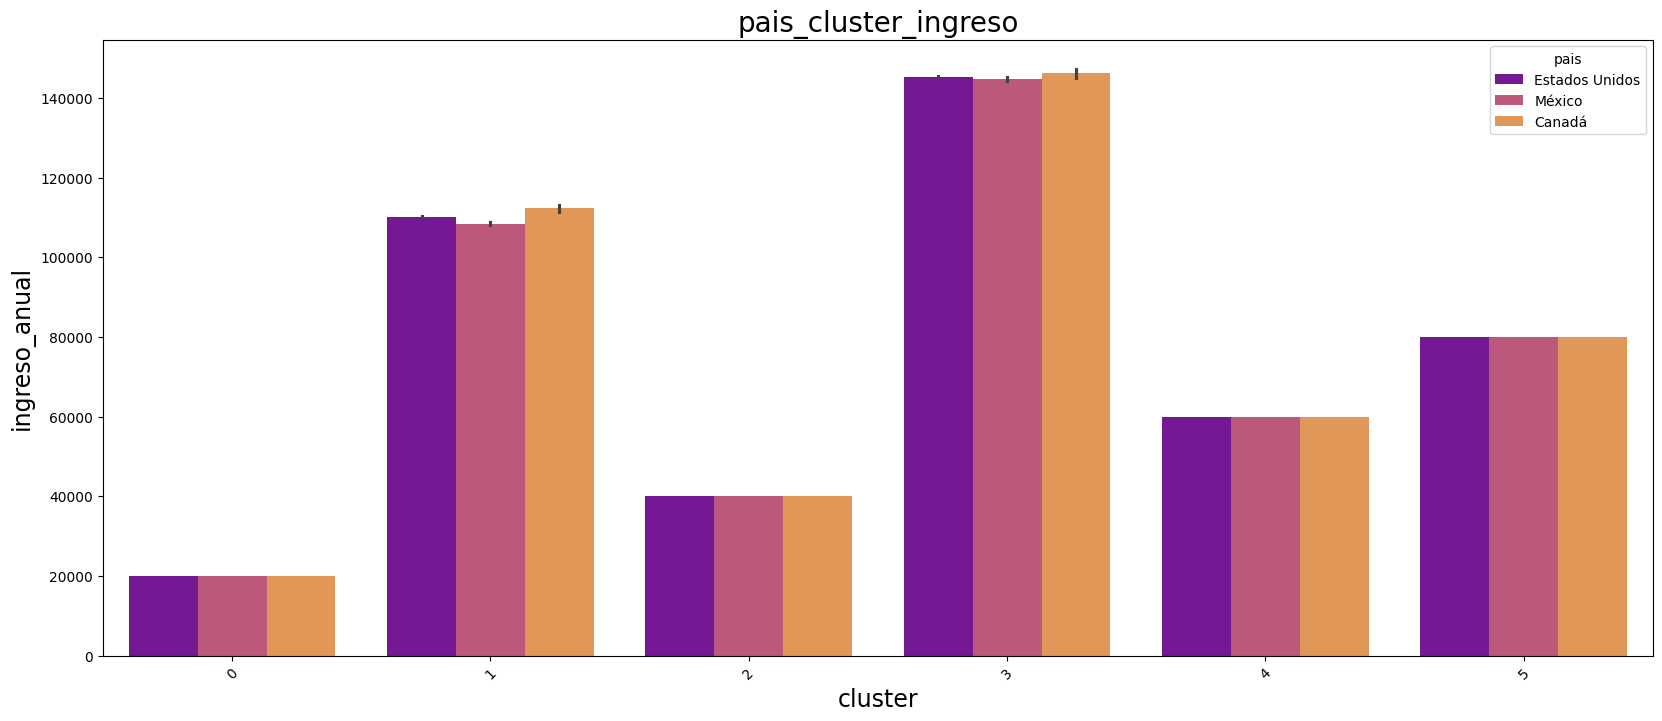

In [ ]:
plt.figure(figsize=(20, 8))

g14 = sns.barplot(x='cluster', y='ingreso_anual',
                 data=datos_raw,
                 hue='pais',
                 palette='plasma')

g14.set_title("pais_cluster_ingreso", fontsize=20)
g14.set_xlabel("cluster", fontsize=17)
g14.set_ylabel("ingreso_anual", fontsize=17)

g14.set_xticklabels(g14.get_xticklabels(), rotation=45)

g14


Se confirma que el clúster 3 es donde estan nuestros clientes de mayor ingreso, con mayoría en Canadá.

<Axes: title={'center': 'pais_cluster_ventas'}, xlabel='pais', ylabel='ventas_tienda_millones'>

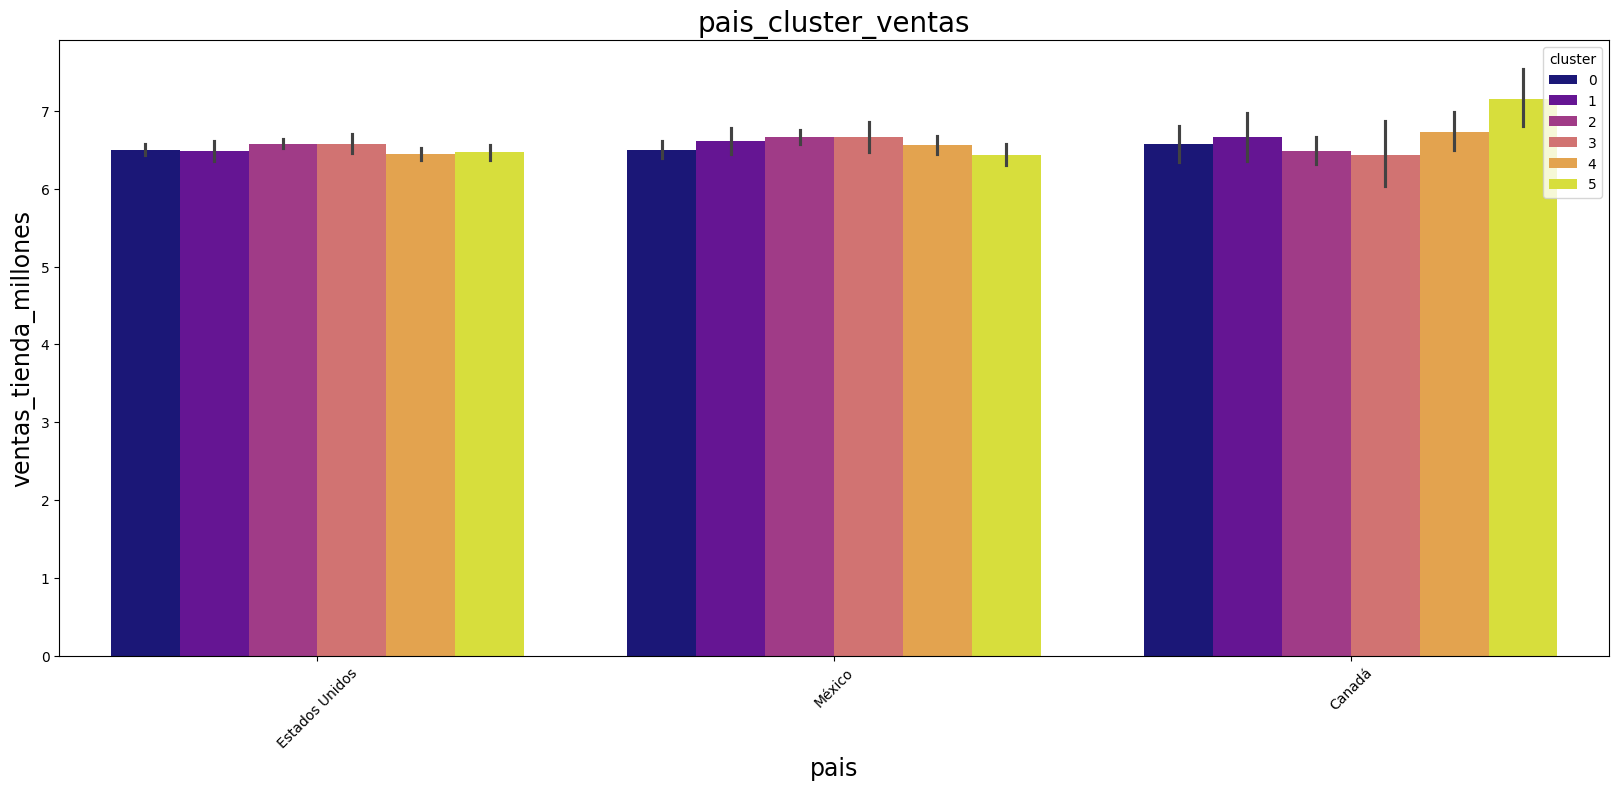

In [ ]:
plt.figure(figsize=(20, 8))

g15 = sns.barplot(x='pais', y='ventas_tienda_millones',
                 data=datos_raw,
                 hue='cluster',
                 palette='plasma')

g15.set_title("pais_cluster_ventas", fontsize=20)
g15.set_xlabel("pais", fontsize=17)
g15.set_ylabel("ventas_tienda_millones", fontsize=17)

g15.set_xticklabels(g15.get_xticklabels(), rotation=45)

g15

Análisis por ventas-clúster-País

En el clúster 5 de color verde fluorescente y el país de Canadá lideran las ventas, lo cual no está proporcional con el nivel de ingresos por clúster que están en el clúster 3. En estados Unidos y México si esta casi homogéneo las ventas e ingresos en clúster 3.

### **Descripción**

**Distribución por clúster **

Se observa que en el clúster número 2 de color verde concentra una mayor frecuencia con el 32.3% y la menor frecuencia está en el clúster número 3 con 7.6%.

**Distribución ingresos anuales por clúster **

Los ingresos anuales por clúster se observan que los menores ingresos quedaron en el clúster 0 quedando en el puesto 6 y los mayores ingresos quedaron en el clúster 3 puesto 1, esté concentra los ingresos de 140.000 y 160.000.  

El clúster 1 concentra los ingresos de 100.000 y 120.000, siendo el segundo en la lista, el tercero es el clúster 5, el cuarto puesto es para el clúster 4 y el quinto puesto el clúster 2.

**Distribución por miembro Clúster **

Se observa que en clúster 0 de color azul claro, esta el miembro normal con un 19.8%, mientras que en el clúster 2 de color verde claro con 23,5%, esta le miembro bronce.

Se observa que en el clúster 0 esta ubicado de mayor preferencia los miembros que no tienen una categoría como miembro que son los clientes normales, para los demás se observa mayor frecuencia de bronce (el cual es nuestro miembro de mayor frecuencia), en el clúster 3 además de mayor frecuencia el bronce, se observa también de mayor frecuencia plata y oro.

**Clusterización por Ocupación, escolaridad y número de hijos **


Se observa que en el clúster 0 esta en ocupación de prevalencia técnico, para el clúster 2 repunta técnico y obrero, en los clústeres 1,3,4 y 5 profesional.

Se observa que en el clúster 0 esta en escolaridad de prevalencia primaria, para los clústeres 1, 2 y 3 es secundaria, para los clústeres 4 y 5  son escolaridad superior.

Para el número de niños prevalece el mayor en todos los clúster que es 0 número de hijos.

En el cluster 3 donde estan los clientes de mayor ingreso la escolaridad de mayor frecuenca  es secundaria y la profesion de mayor frecuencia es profesional
seria interesante revisar el  porque teniendo menos estudio sus ocupaciones son de profesional y mayores ingresos, seria bueno especificar en un proximo estudio a que se dedican detalladamente o revisar la estandarización del presente modelo.

**Análisis por tipo de alimentos, ingresos, clúster **

En el clúster 3, de color rojizo, se encuentran agrupados los clientes que perciben más ingresos y están relacionados con el tipo de productos de comida.

En el clúster 3, de color rojizo, se encuentran agrupados los clientes que perciben más ingresos y están relacionados con el tipo de productos no comestibles.

En el clúster 3, de color rojizo, se encuentran agrupados los clientes que perciben ingresos y estan relacionados con el tipo de productos de bebida.

Se confirma que el clúster 3 es donde estan nuestros clientes de mayor ingreso, con mayoría en Canadá.

**Análisis por tipo-ventas-clúster **

En el clúster 2, de color verde, se encuentran agrupados los clientes que gastan más dinero en productos de comida.

En el clúster 3, de color rojo, se encuentran agrupados los clientes que gastan más dinero en productos no comestibles.

En el clúster 1, de color café oscuro, se encuentran agrupados los clientes que gastan más dinero en productos de bebida.

**Análisis por ventas-clúster-País **

En el clúster 5 de color verde fluorescente y el país de Canadá lideran las ventas, lo cual no está proporcional con el nivel de ingresos por clúster que están en el clúster 3. En estados Unidos y México si esta casi homogéneo las ventas e ingresos en clúster 3.

### Posibles estrategias a implementar

En el cluster 0, se encuentran reunidos los clientes de menores ingresos, que en su mayoria no estan afiliados a ningun membresia y que gastan más dinero en productos no comestibles.

Estrategia sugerida: Elaborar una campaña dirigida a estos clientes para que también compren productos de comida.

En el cluster 1, se encuentran reunidos los clientes número 2 de ingresos, que en su mayoria son  miembros bronce,  y  que  que gastan más dinero en productos de comida.

Estrategia sugerida: Elaborar una campaña dirigida a estos clientes para que también compren productos no comestibles y de bebida. Incentivar consumo para que se vuelvan miembros oro y plata. Adicional de revisar los beneficios de las membresias oro y plata para hacerlas más atractivas.

En el cluster 2, se encuentran reunidos los clientes número 5 de ingresos, que en su mayoria son  miembros bronce y  que  que gastan más dinero en productos no comestibles.

Estrategia sugerida: Elaborar una  campaña dirigida a estos clientes para que también compren productos de comida.

En el cluster 3, se encuentran reunidos los clientes número 1 de ingresos, que en su mayoria son  miembros bronce y   que tienen una mayor frecuencia en las membresias plata y oro a comparacion de los otros clústeres y que gastan más dinero en productos no comestibles.

Estrategia sugerida: Elaborar una campaña dirigida a estos clientes para que también compren productos comestibles y de bebida. Incentivar consumo para que los miembros bronce se conviertan en oro y plata. Adicional de revisar los beneficios de las membresias oro y plata para hacerlas más atractivas.

En el cluster 4, se encuentran reunidos los clientes número 4 de ingresos, que en su mayoria son  miembros bronce y que gastan más dinero en productos no comestibles y comida.

Estrategia sugerida: Elaborar una campaña dirigida a estos clientes para que mantengan constante la compra con nosotros.

En el cluster 5, se encuentran reunidos los clientes número 3 de ingresos, que en su mayoria son  miembros bronce  y que gastan más dinero en productos no comestibles y comida. En Canada son los numero 1 en ventas.

Estrategia sugerida: Elaborar una campaña dirigida a estos clientes para que también compren productos de bebida. Verificar membresias en Canadà ya que es donde mas vendemos.

Como la mayoria no tiene hijos se pueden hacer campanas para  incentivar comprar  para sus mascotas y sus casas. Adicional de recalcar la importancia de ayudar al medio ambiente.
